In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('C:/Users/asus/Downloads/archive19/covid_19_data.csv')

In [4]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [5]:
df.drop(['SNo','Last Update'],axis =1 ,inplace=True)

In [6]:
df.head()

ObservationDate Province/State  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [7]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [8]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [30]:
df['Date']=pd.to_datetime(df['Date'])

In [31]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [11]:
df.describe()

Confirmed         Deaths     Recovered
count  3.064290e+05  306429.000000  3.064290e+05
mean   8.567091e+04    2036.403268  5.042029e+04
std    2.775516e+05    6410.938048  2.015124e+05
min   -3.028440e+05    -178.000000 -8.544050e+05
25%    1.042000e+03      13.000000  1.100000e+01
50%    1.037500e+04     192.000000  1.751000e+03
75%    5.075200e+04    1322.000000  2.027000e+04
max    5.863138e+06  112385.000000  6.399531e+06

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   Province   228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [14]:
df=df.fillna('NA')


In [17]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [22]:
df2 = df.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [23]:
df2

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28        1.0     0.0        0.0
1                     ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2                         Afghanistan 2020-02-24        1.0     0.0        0.0
3                         Afghanistan 2020-02-25        1.0     0.0        0.0
4                         Afghanistan 2020-02-26        1.0     0.0        0.0
...                               ...        ...        ...     ...        ...
87276  occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
87277  occupied Palestinian territory 2020-03-14        0.0     0.0        0.0
87278  occupied Palestinian territory 2020-03-15        0.0     0.0        0.0
87279  occupied Palestinian territory 2020-03-16        0.0     0.0        0.0
87280  occupied Palestinian territory 2020-03-17        0.0     0.0        0.0

[87281 rows x 5 columns]

In [21]:
df2.head(10)

Country    Confirmed      Deaths    Recovered
0           Azerbaijan          1.0         0.0          0.0
1      ('St. Martin',)          2.0         0.0          0.0
2          Afghanistan   17026442.0    669075.0   13464399.0
3              Albania   19768869.0    375955.0   13945256.0
4              Algeria   27684358.0    834464.0   18959299.0
5              Andorra    2379802.0     32100.0    2162473.0
6               Angola    4764863.0    116489.0    3683041.0
7  Antigua and Barbuda     143868.0      4059.0     109958.0
8            Argentina  504802880.0  12112441.0  438750295.0
9              Armenia   42536277.0    770759.0   37101575.0

In [24]:
df3=df2[df2['Confirmed']>100]

In [25]:
df3

Country       Date  Confirmed  Deaths  Recovered
35     Afghanistan 2020-03-28      107.0     4.0        2.0
36     Afghanistan 2020-03-29      118.0     4.0        2.0
37     Afghanistan 2020-03-30      146.0     4.0        2.0
38     Afghanistan 2020-03-31      175.0     4.0        5.0
39     Afghanistan 2020-04-01      197.0     4.0        5.0
...            ...        ...        ...     ...        ...
87269     Zimbabwe 2021-05-25    38706.0  1587.0    36517.0
87270     Zimbabwe 2021-05-26    38819.0  1589.0    36531.0
87271     Zimbabwe 2021-05-27    38854.0  1592.0    36541.0
87272     Zimbabwe 2021-05-28    38918.0  1592.0    36563.0
87273     Zimbabwe 2021-05-29    38933.0  1594.0    36578.0

[75055 rows x 5 columns]

In [26]:
import matplotlib.pyplot as plt

In [33]:
df2.head()

Date   Province         Country Confirmed Deaths Recovered
0 2020-01-22      Anhui  Mainland China       1.0    0.0       0.0
1 2020-01-22    Beijing  Mainland China      14.0    0.0       0.0
2 2020-01-22  Chongqing  Mainland China       6.0    0.0       0.0
3 2020-01-22     Fujian  Mainland China       1.0    0.0       0.0
4 2020-01-22      Gansu  Mainland China       0.0    0.0       0.0

In [32]:
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [34]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [35]:
df3

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28        1.0     0.0        0.0
1                     ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2                         Afghanistan 2020-02-24        1.0     0.0        0.0
3                         Afghanistan 2020-02-25        1.0     0.0        0.0
4                         Afghanistan 2020-02-26        1.0     0.0        0.0
...                               ...        ...        ...     ...        ...
87276  occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
87277  occupied Palestinian territory 2020-03-14        0.0     0.0        0.0
87278  occupied Palestinian territory 2020-03-15        0.0     0.0        0.0
87279  occupied Palestinian territory 2020-03-16        0.0     0.0        0.0
87280  occupied Palestinian territory 2020-03-17        0.0     0.0        0.0

[87281 rows x 5 columns]

In [36]:
df3.head(20)

Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
5       Afghanistan 2020-02-27        1.0     0.0        0.0
6       Afghanistan 2020-02-28        1.0     0.0        0.0
7       Afghanistan 2020-02-29        1.0     0.0        0.0
8       Afghanistan 2020-03-01        1.0     0.0        0.0
9       Afghanistan 2020-03-02        1.0     0.0        0.0
10      Afghanistan 2020-03-03        2.0     0.0        0.0
11      Afghanistan 2020-03-04        4.0     0.0        0.0
12      Afghanistan 2020-03-05        4.0     0.0        0.0
13      Afghanistan 2020-03-06        4.0     0.0        0.0
14      Afghanistan 2020-03-07        4.0     0.0        0.0
15      Afghanistan 2020-03-08        5.0     0.0        0.0
16      Afghanistan 2020-03-09        7.0     0.0        0.0
17      Afghanistan 2020-03-10        8.0     0.0        0.0
18      Afghanistan 2020-03-11       11.0     0.0        0.0
19      Afghanistan 2020-03-12       12.0     0.0        0.0

In [37]:
countries=df3['Country'].unique()
len(countries)

229

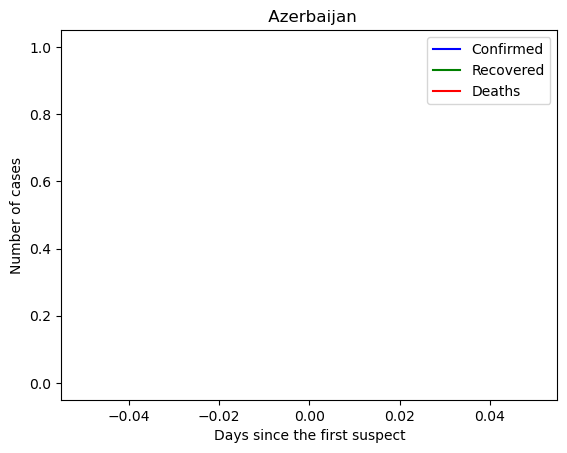

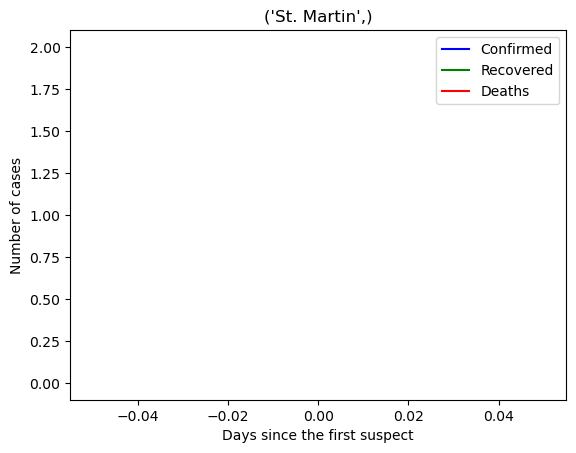

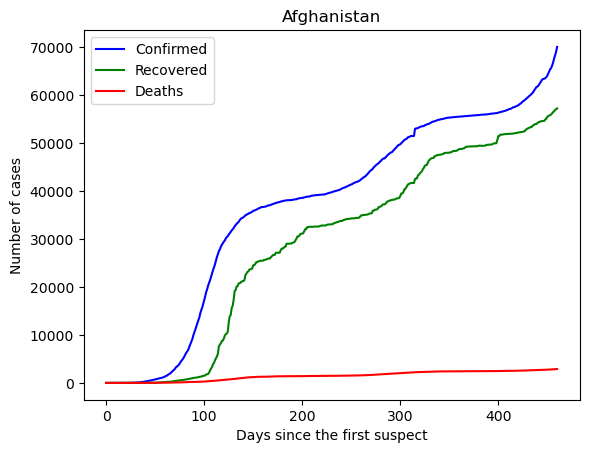

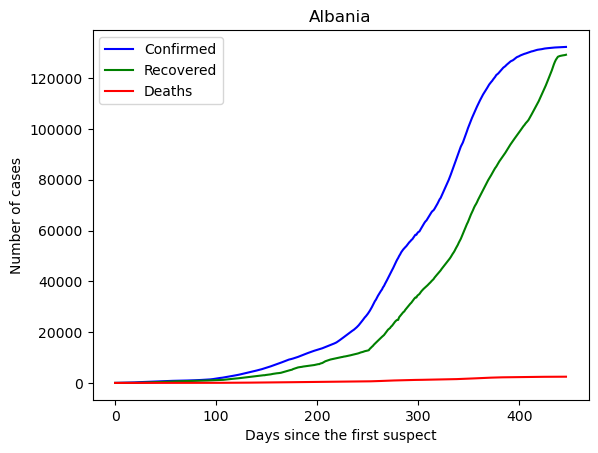

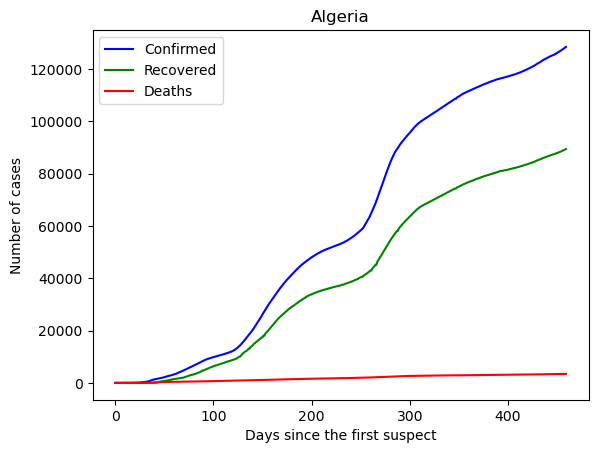

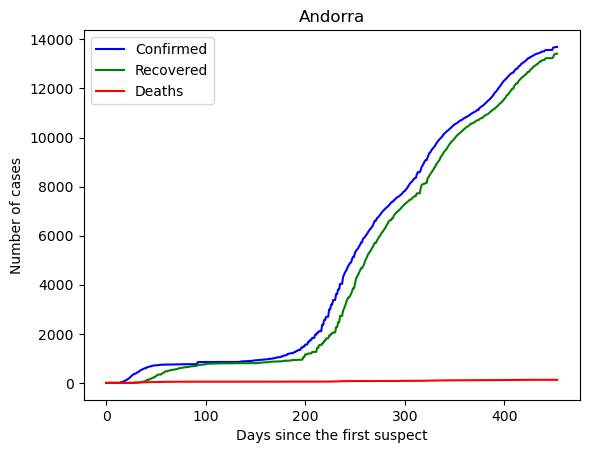

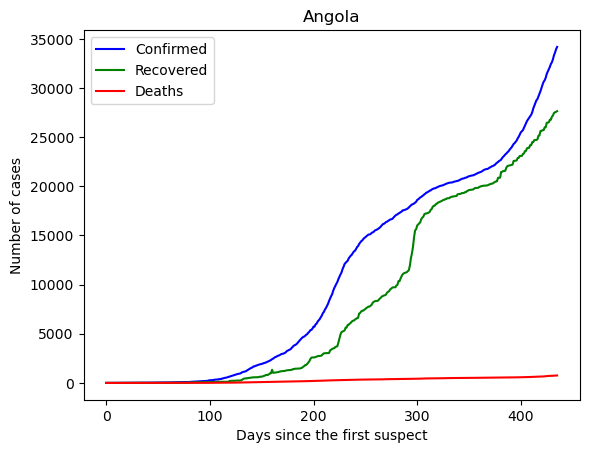

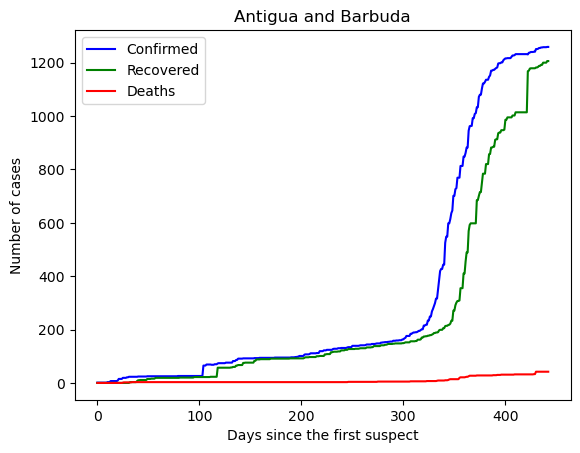

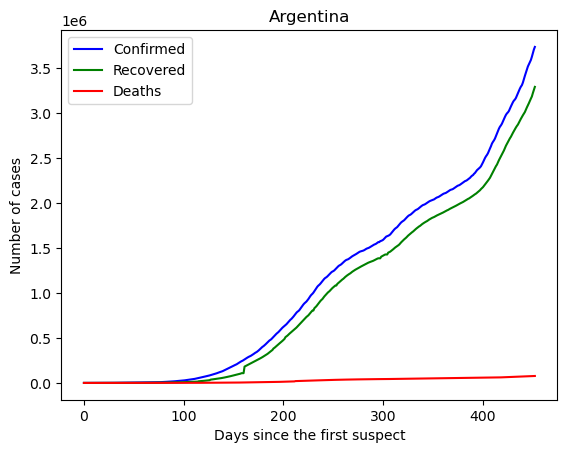

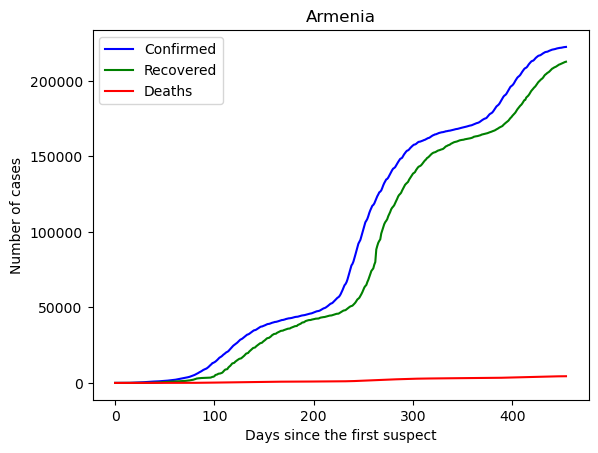

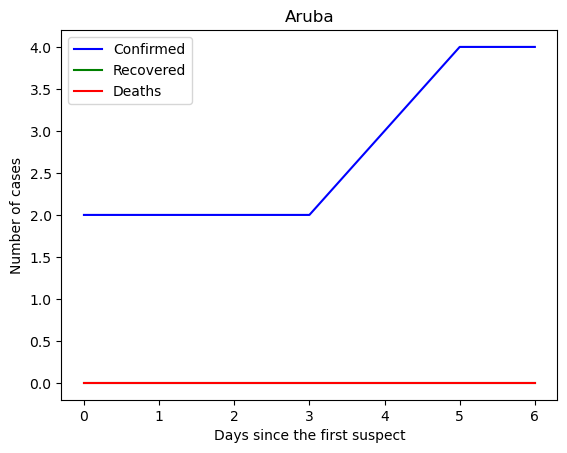

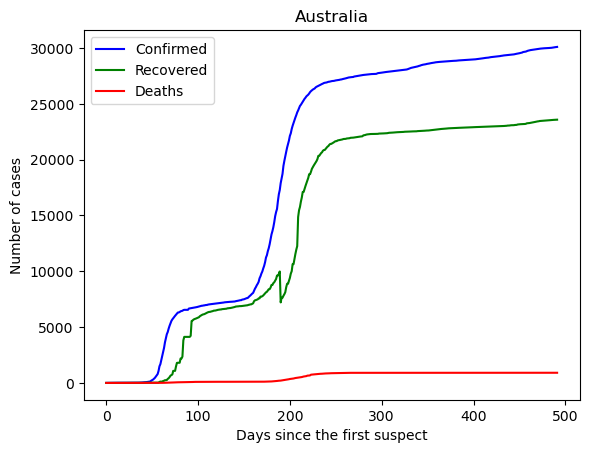

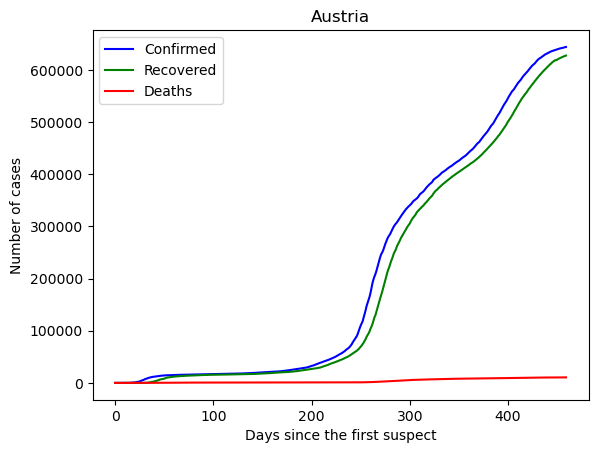

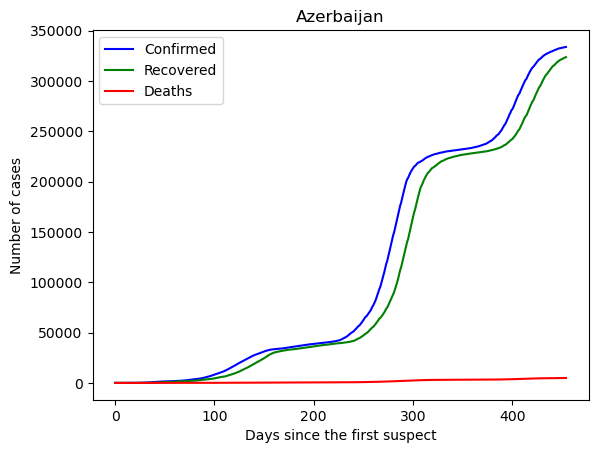

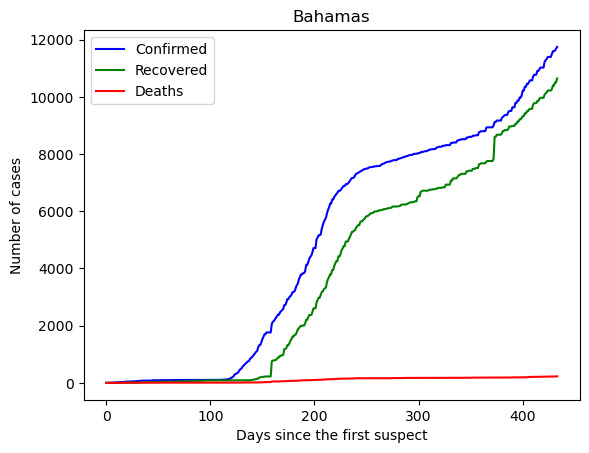

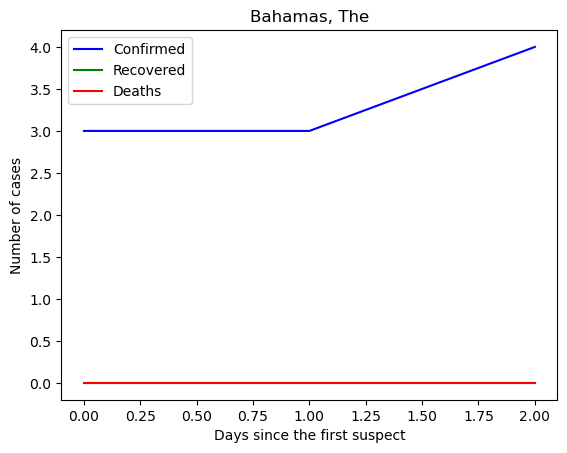

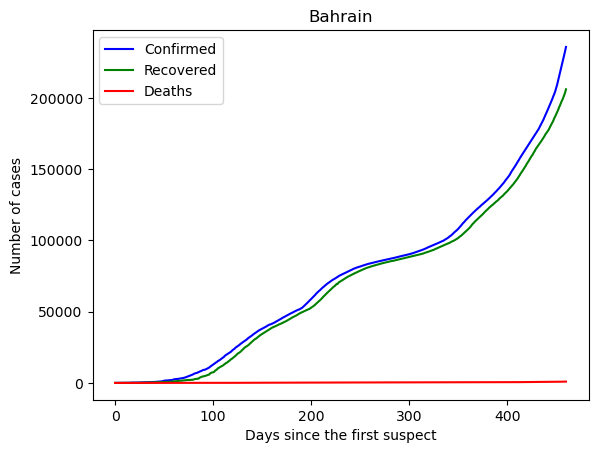

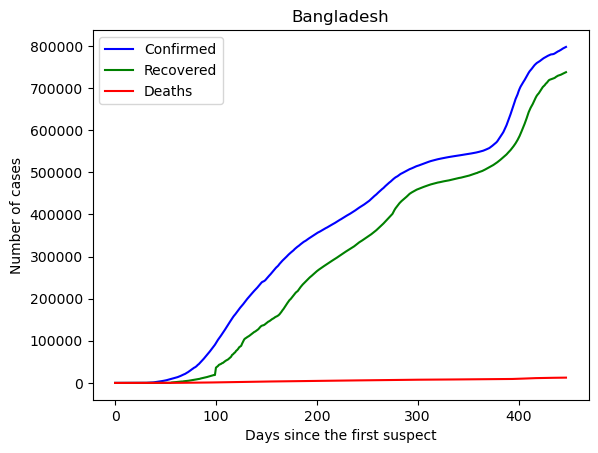

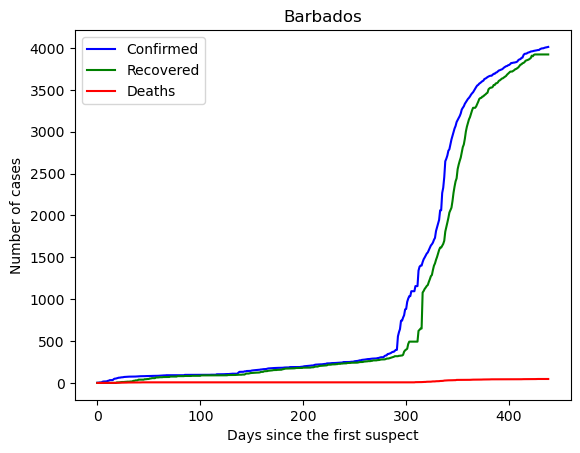

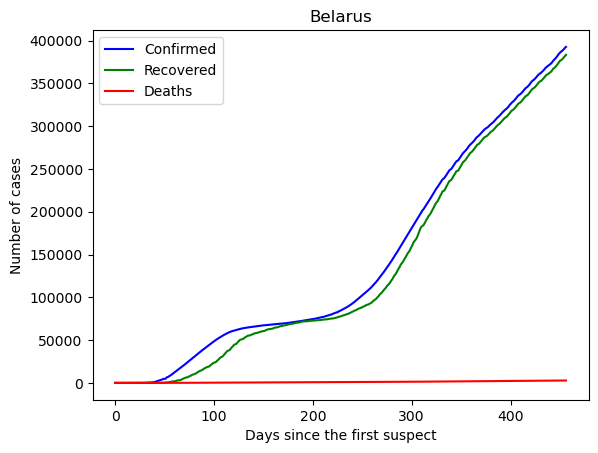

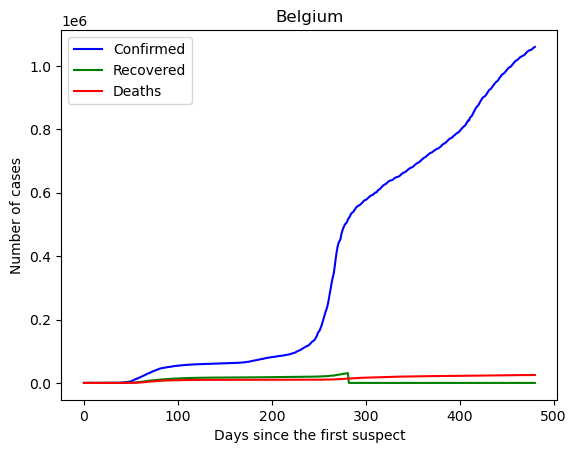

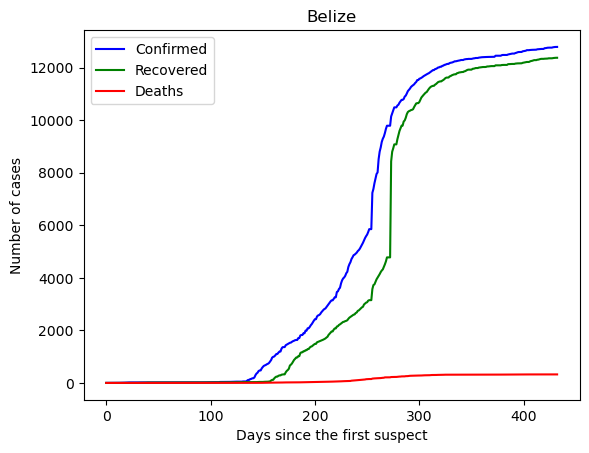

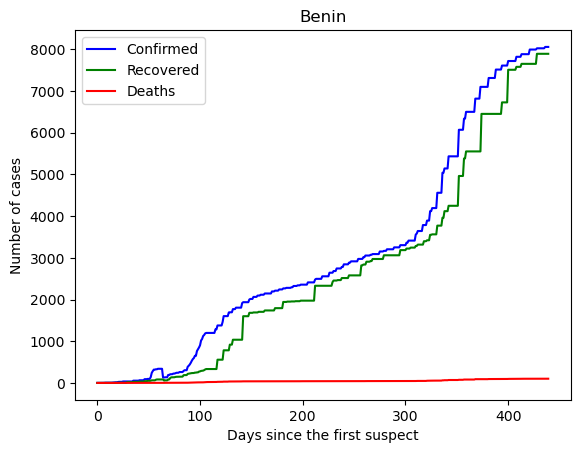

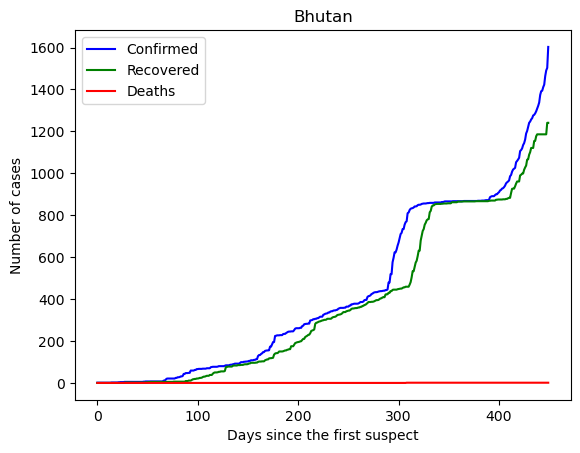

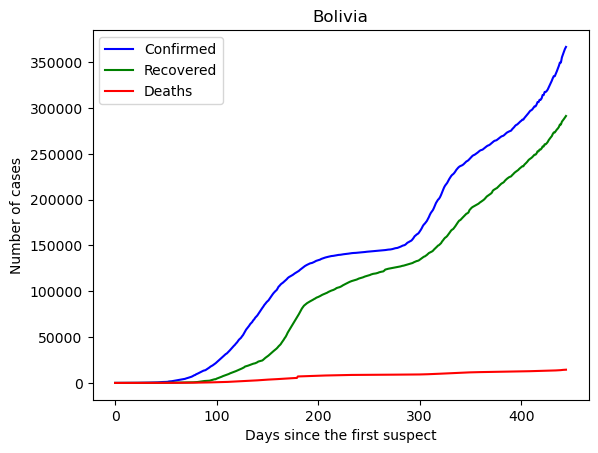

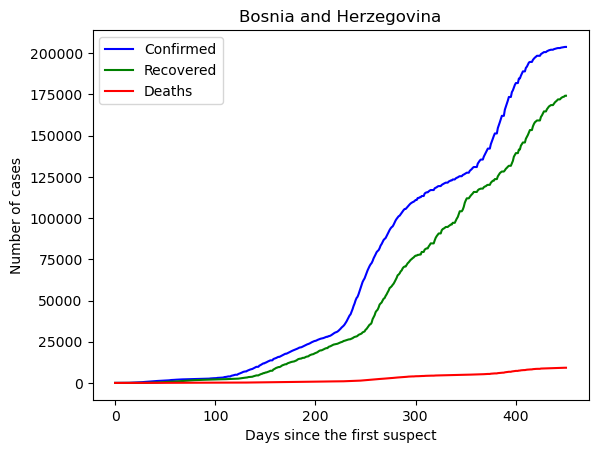

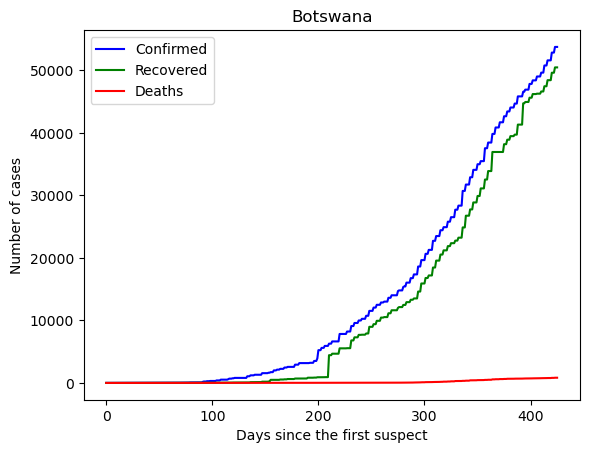

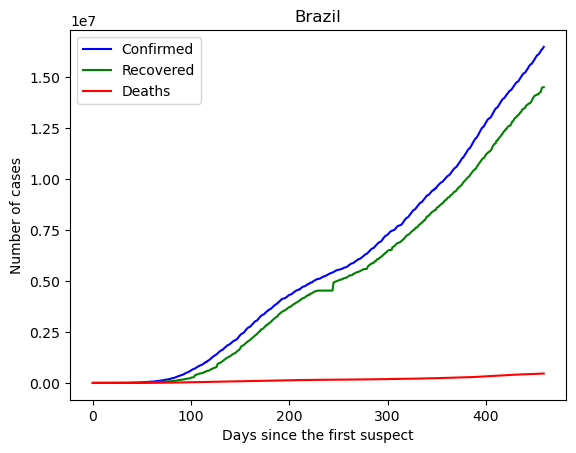

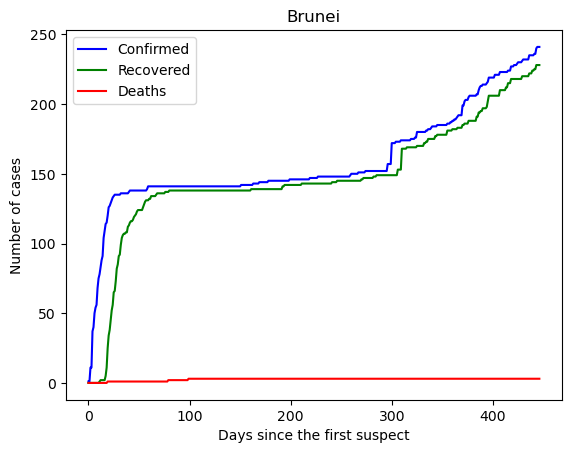

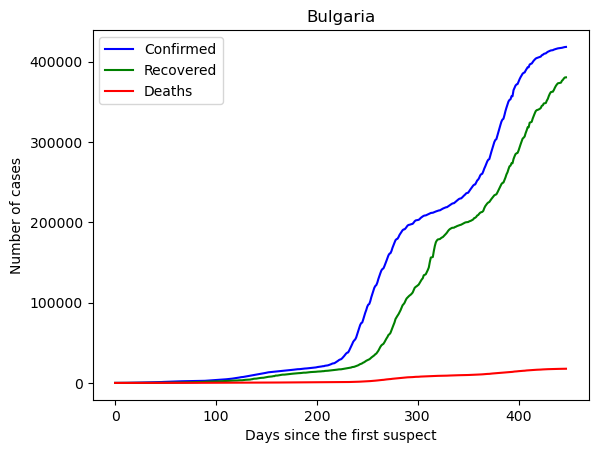

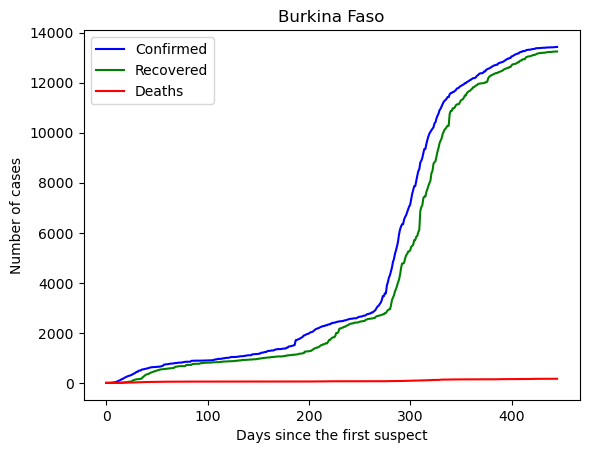

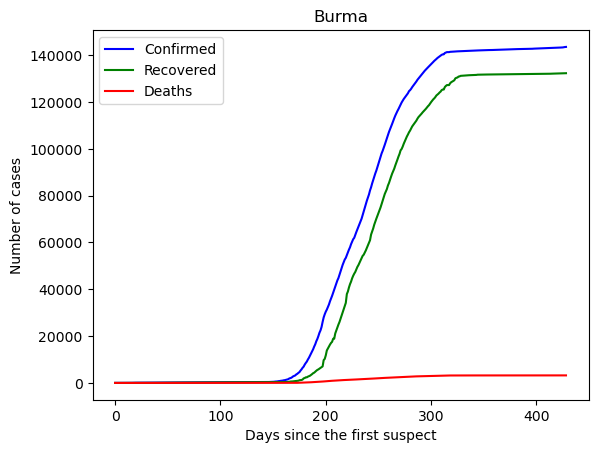

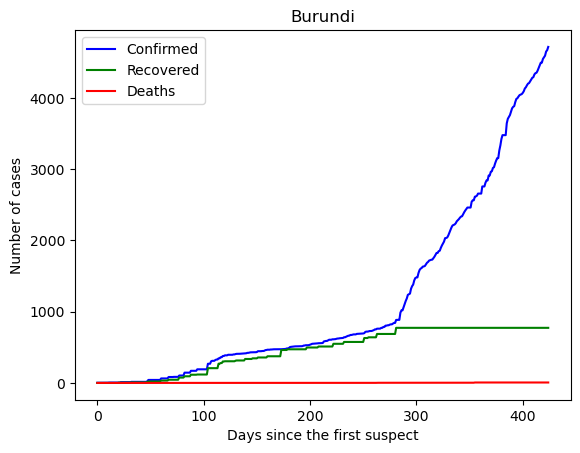

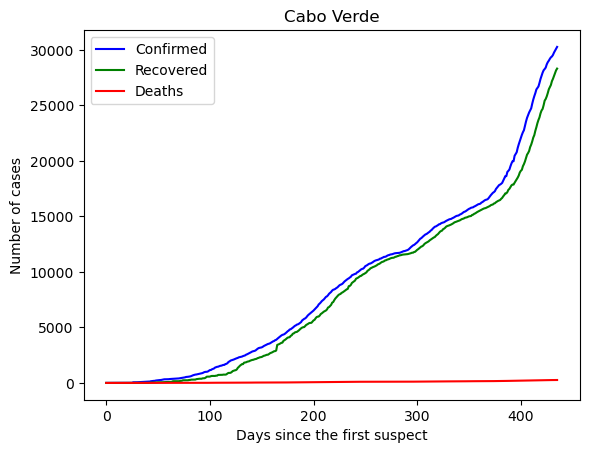

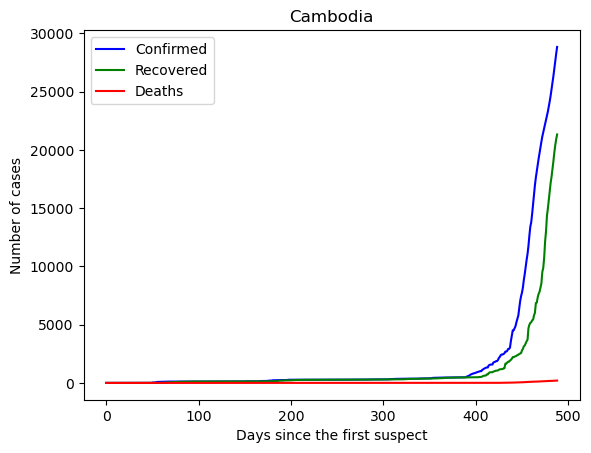

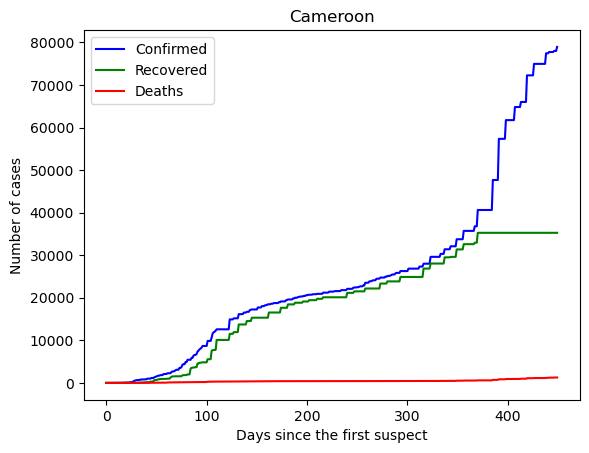

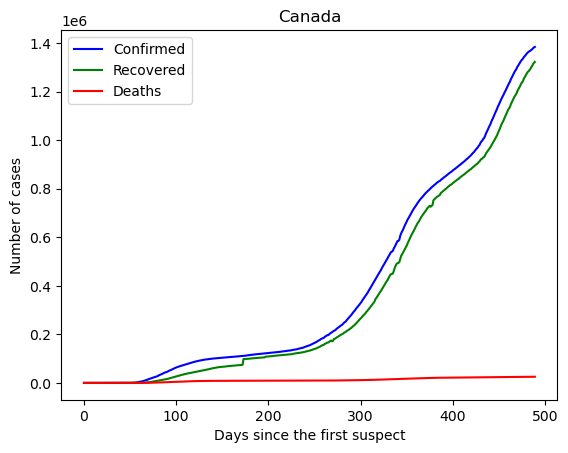

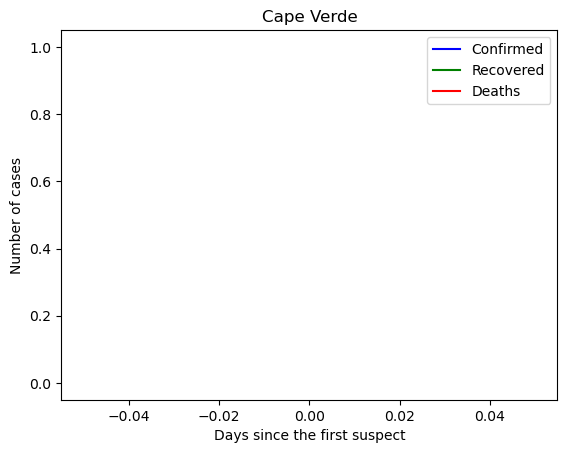

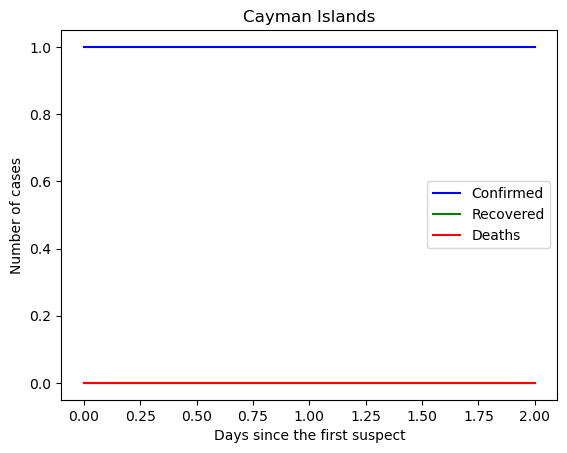

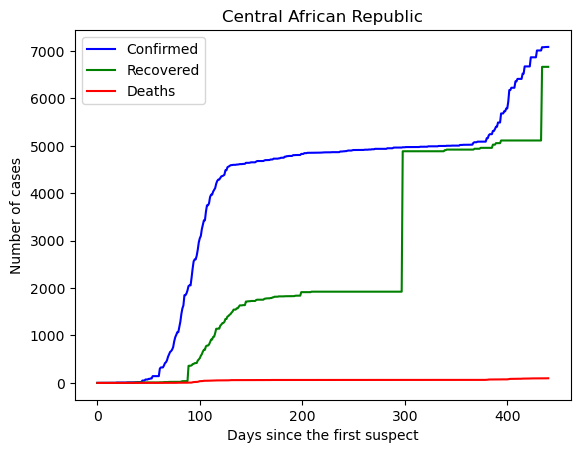

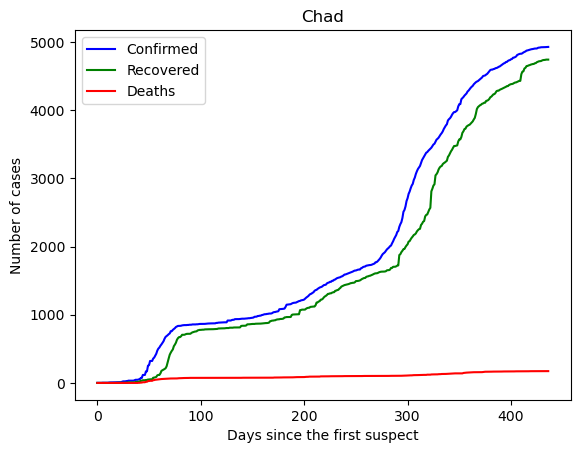

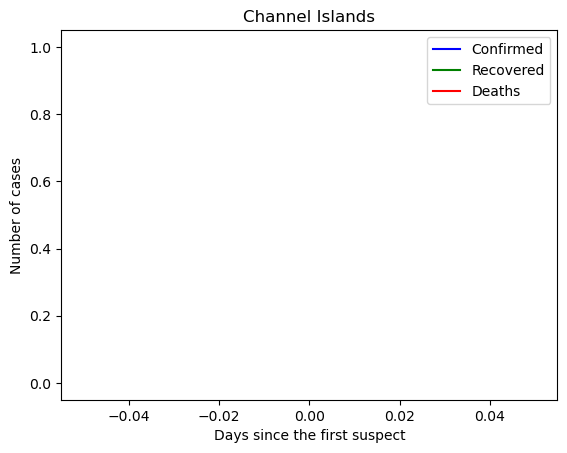

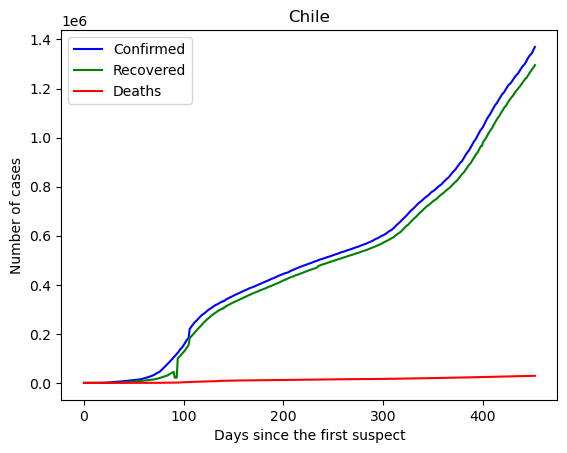

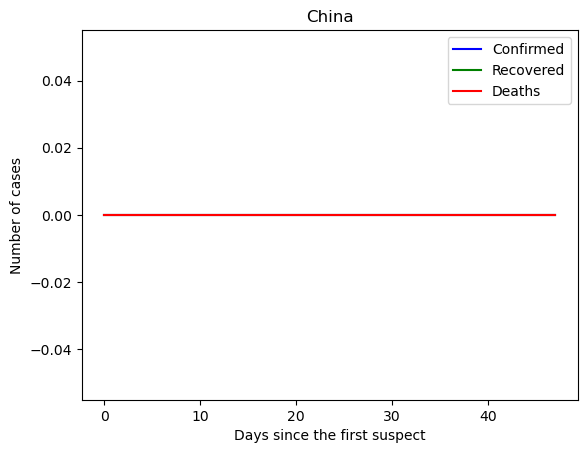

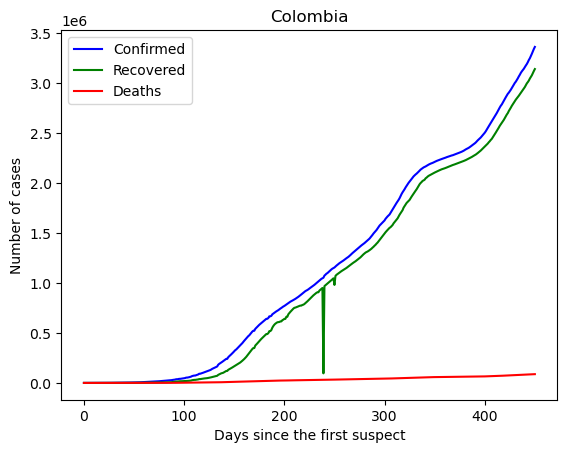

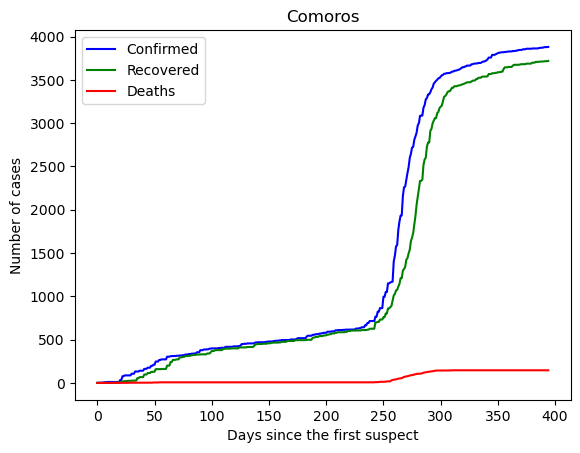

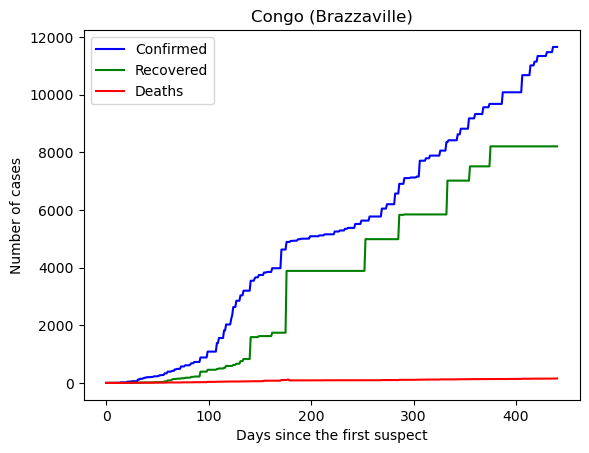

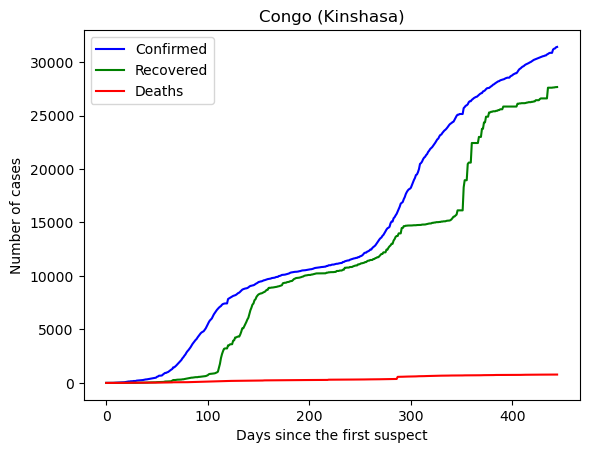

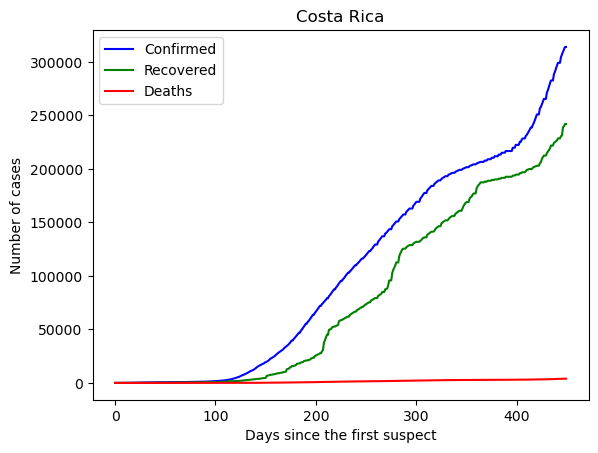

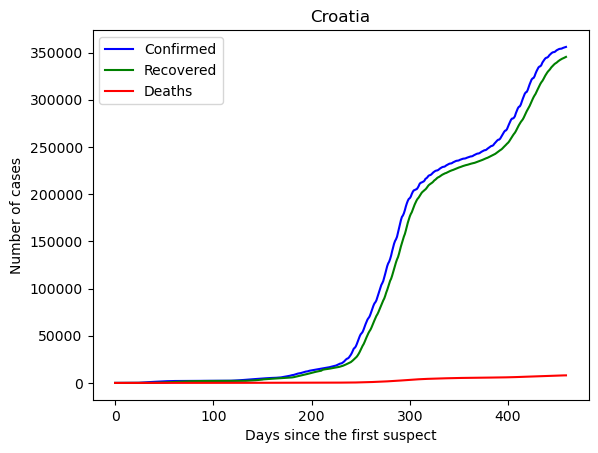

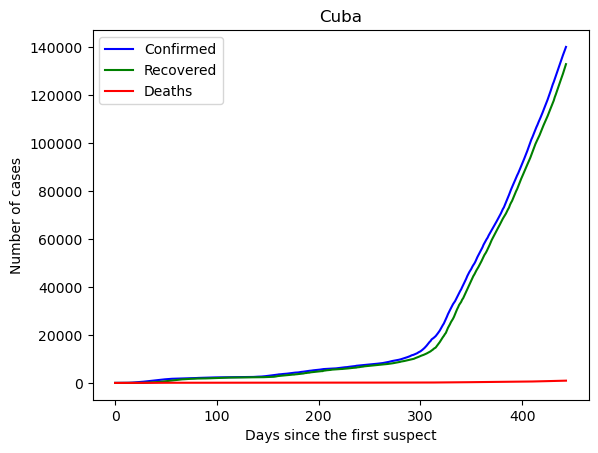

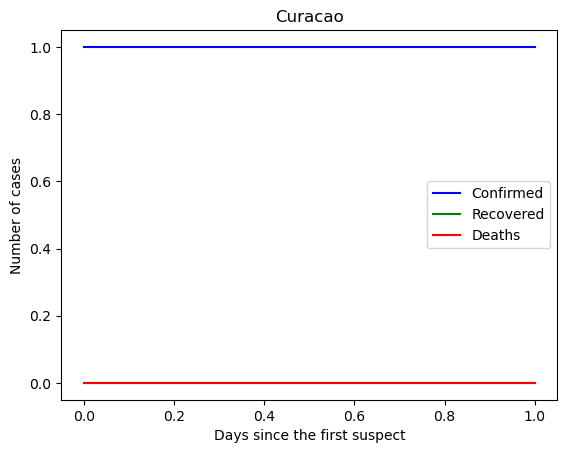

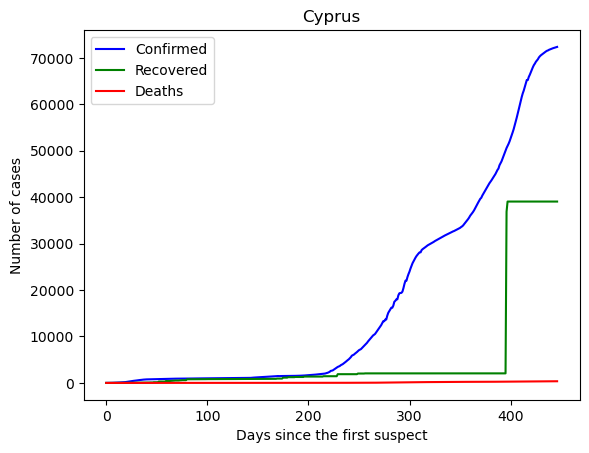

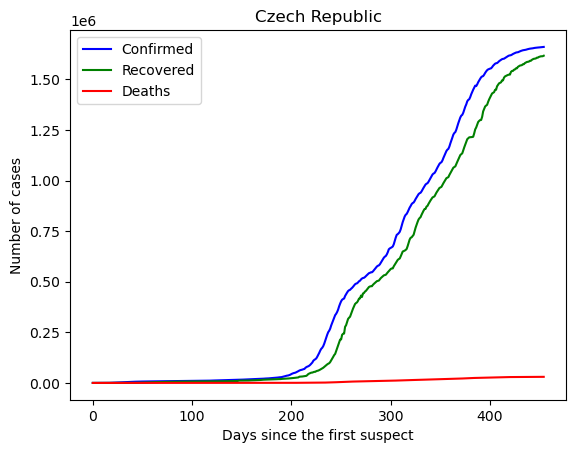

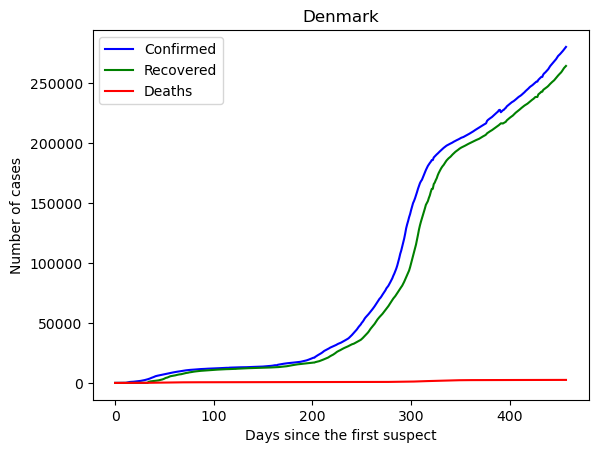

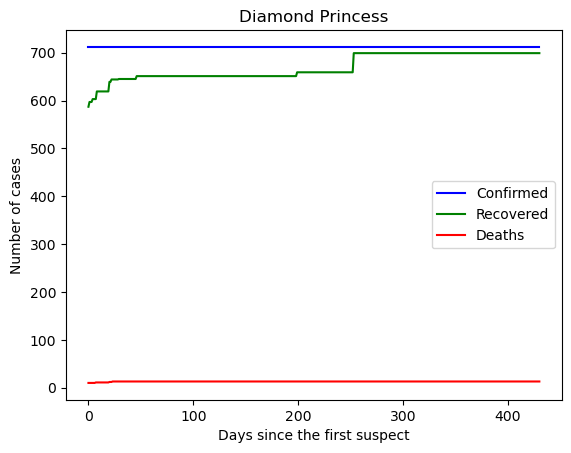

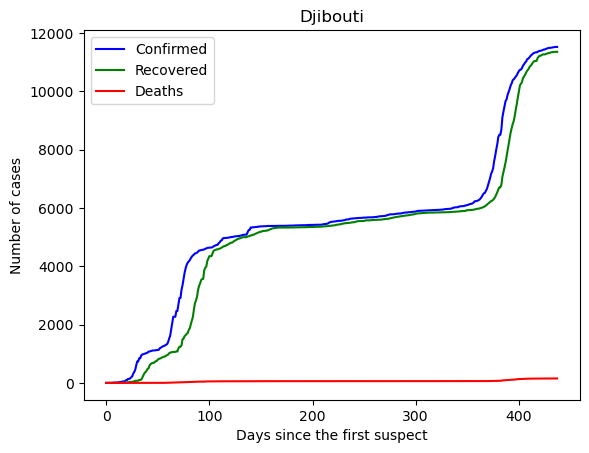

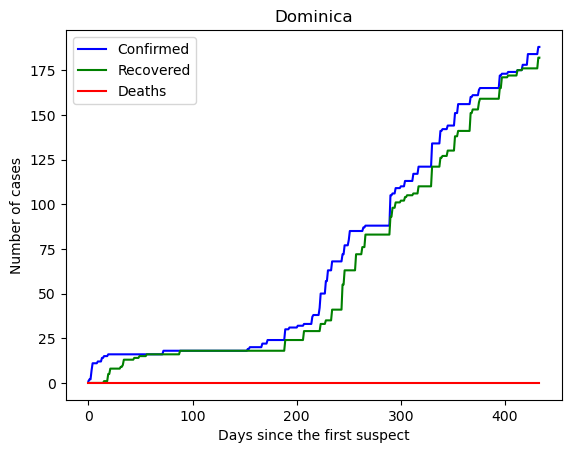

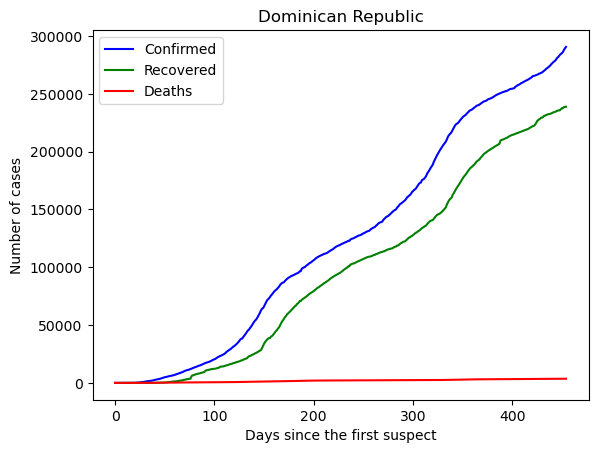

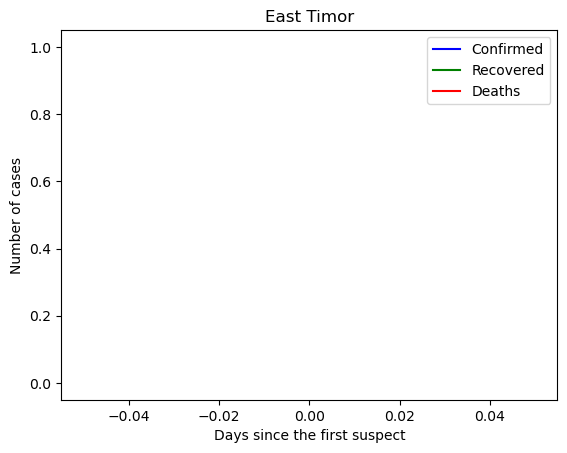

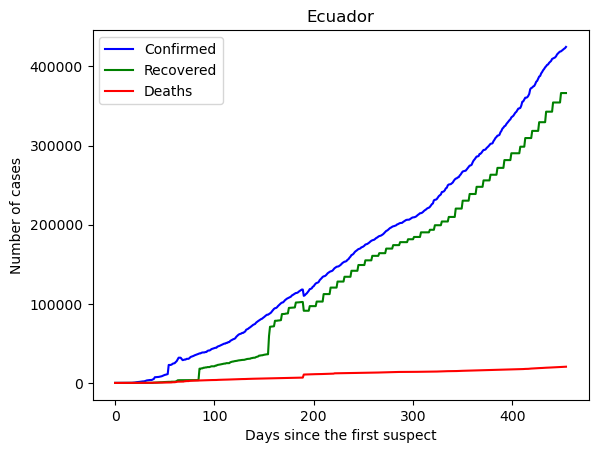

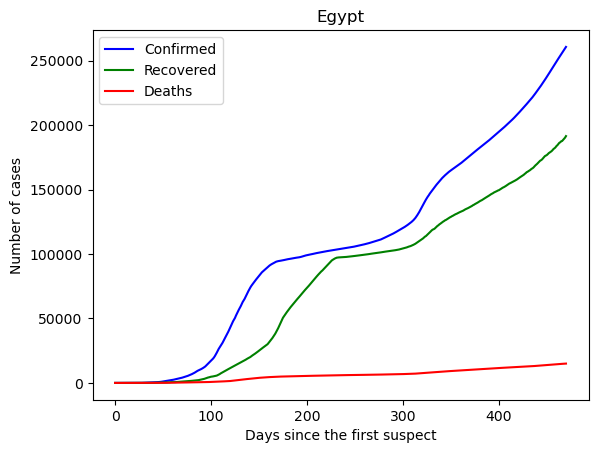

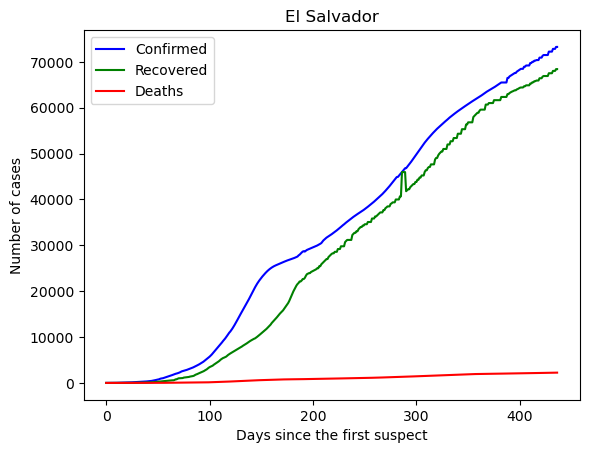

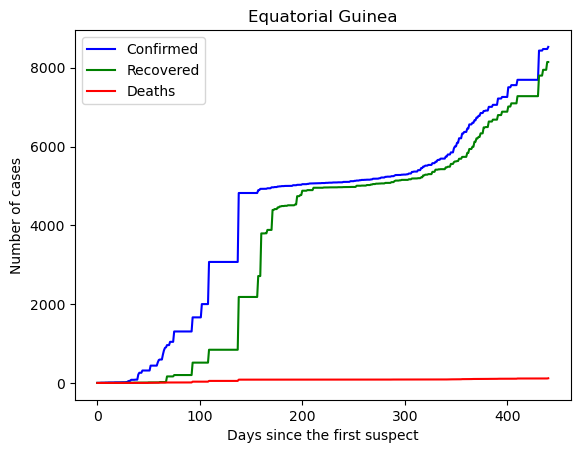

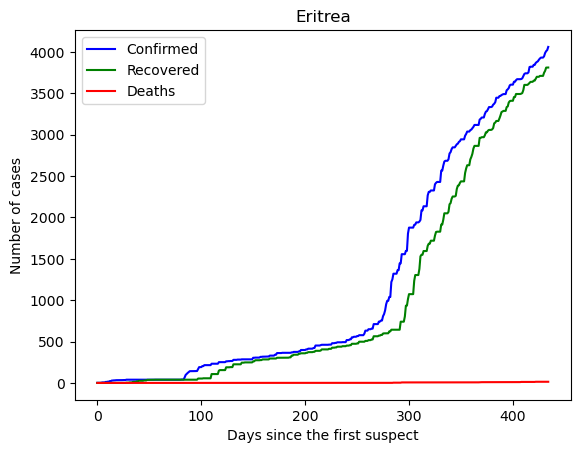

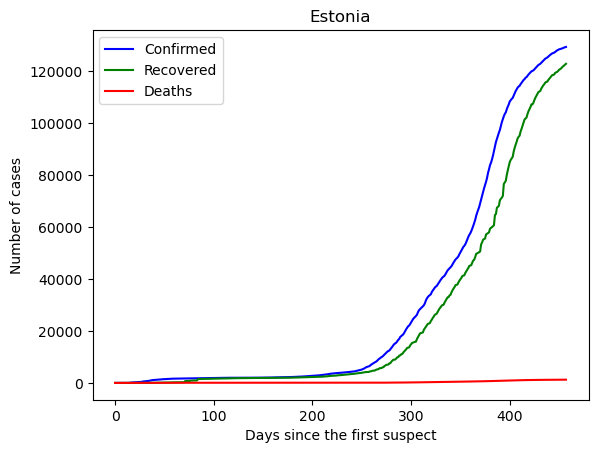

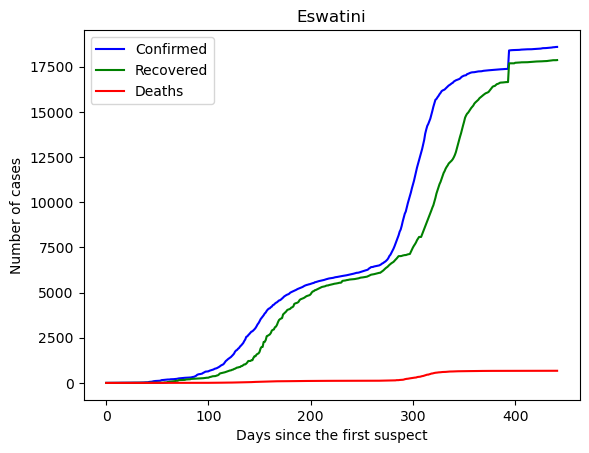

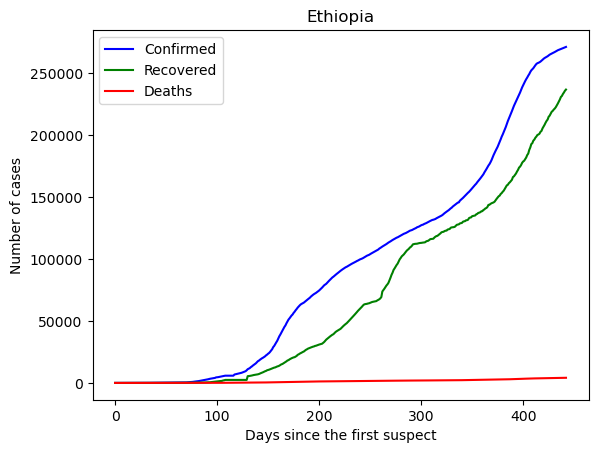

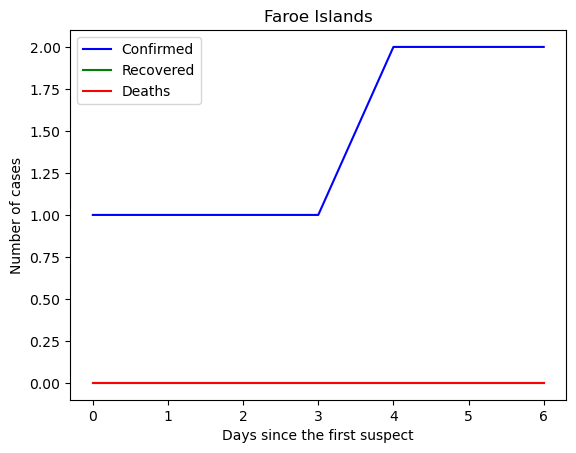

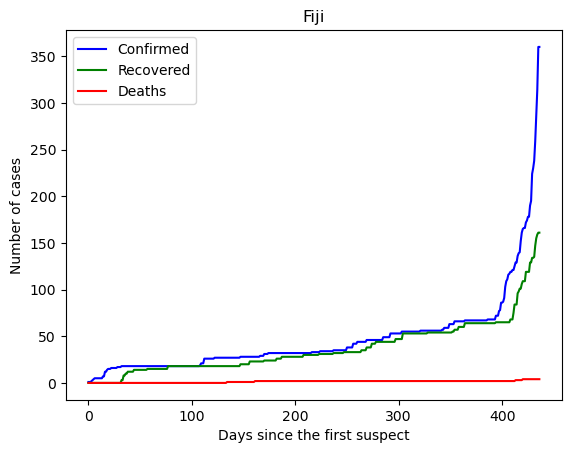

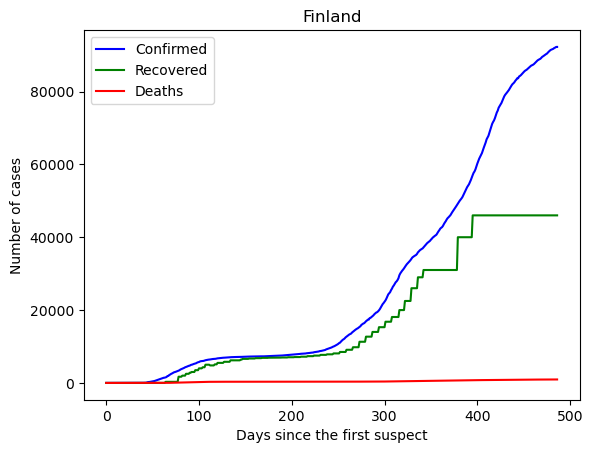

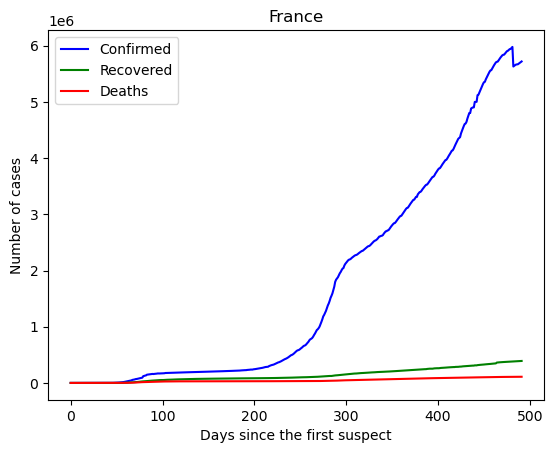

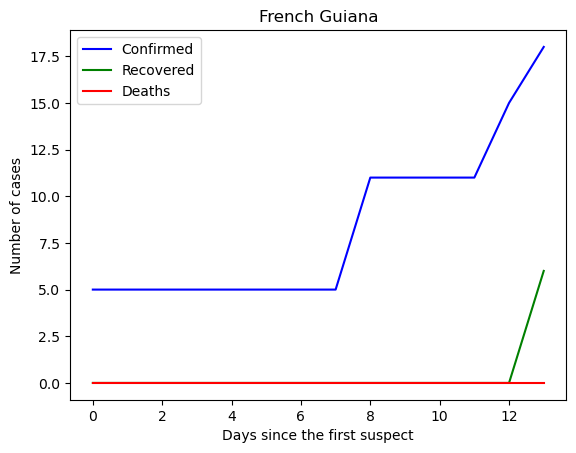

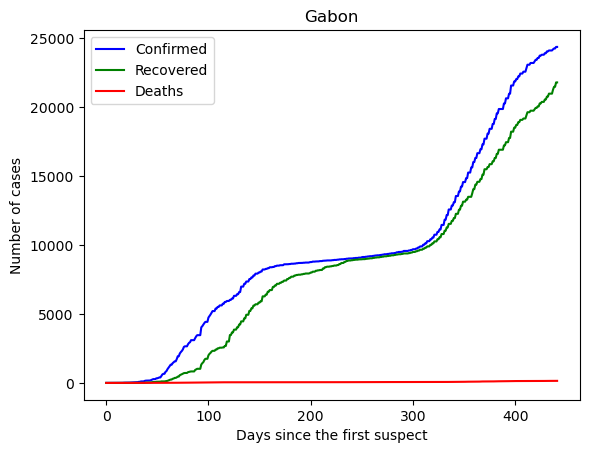

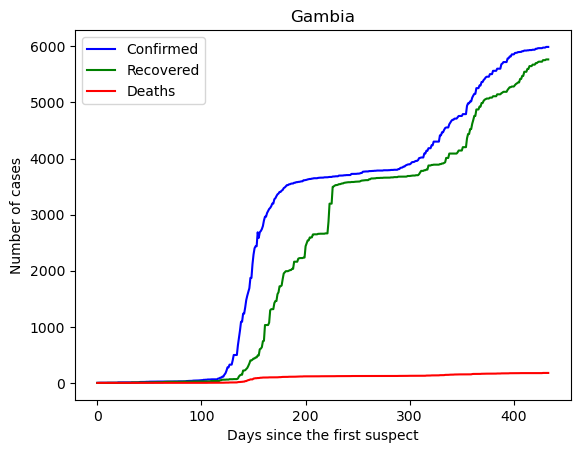

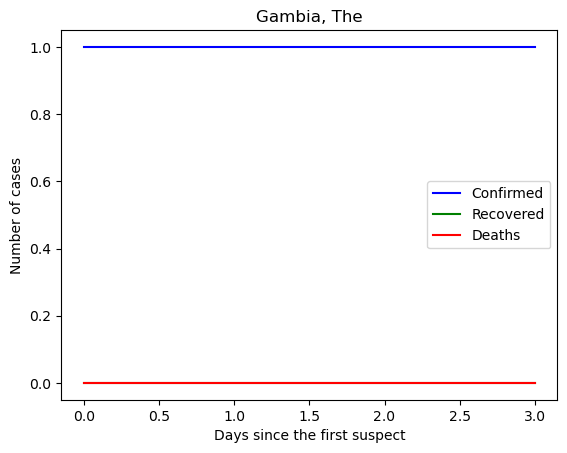

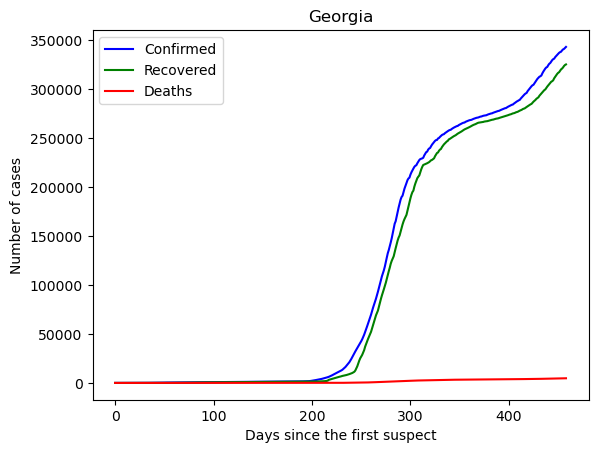

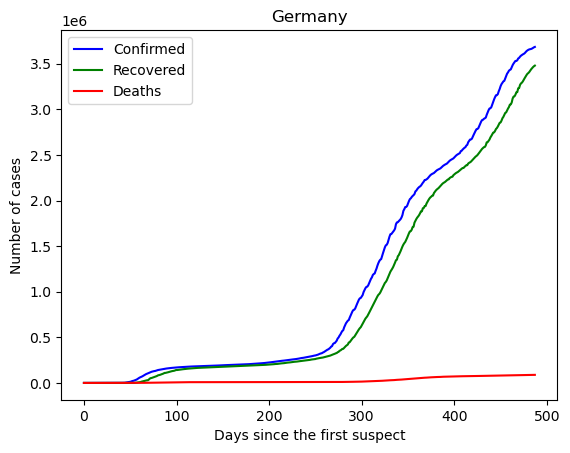

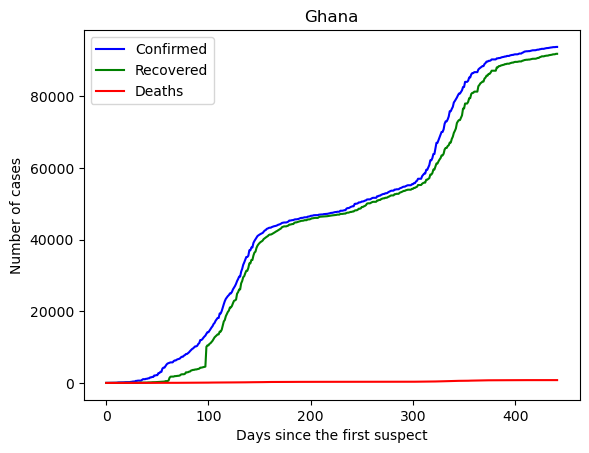

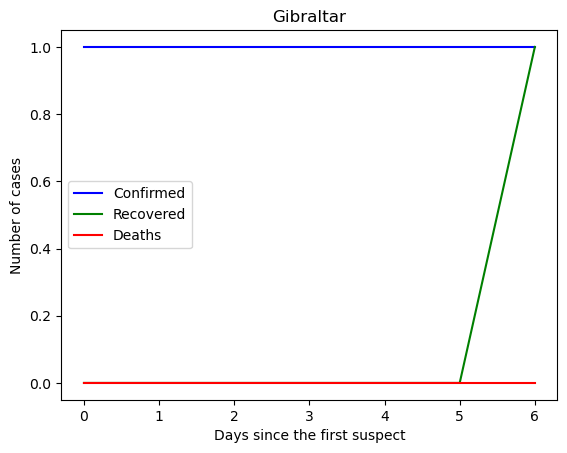

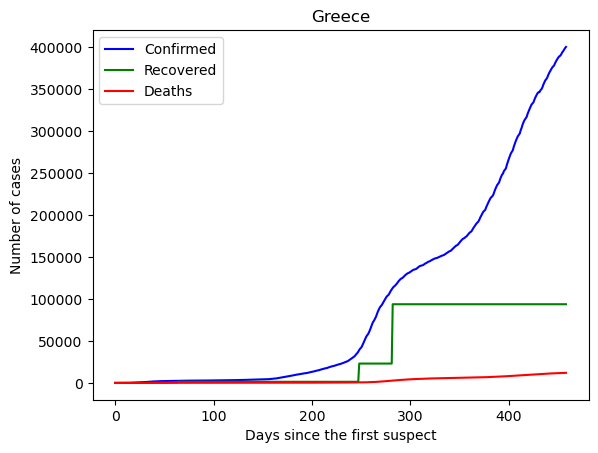

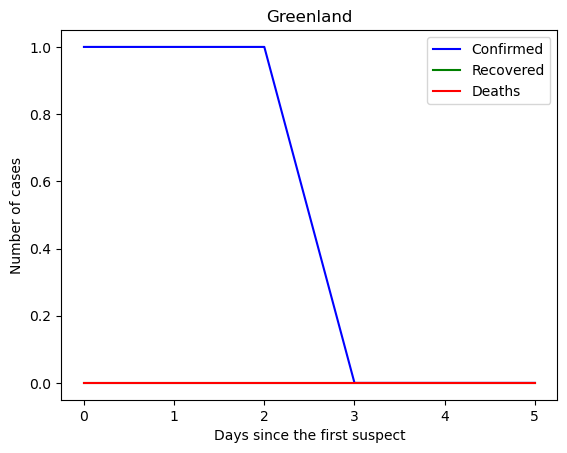

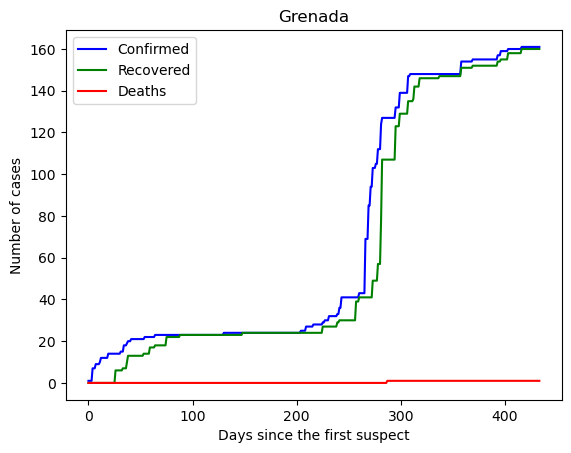

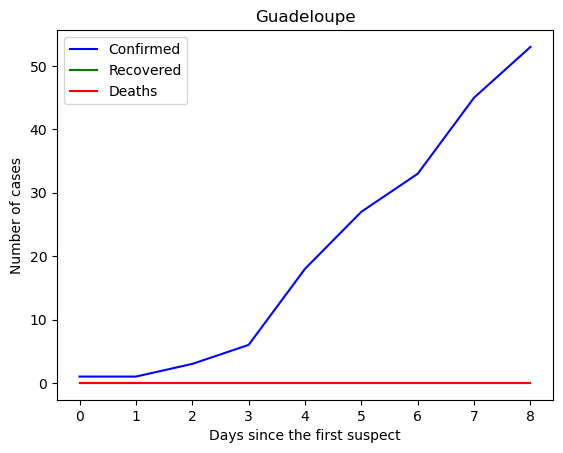

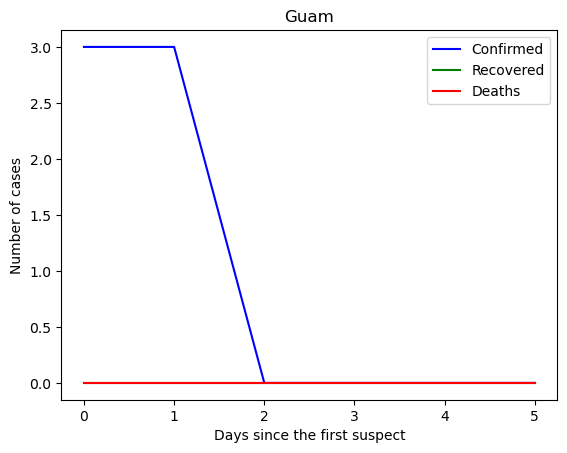

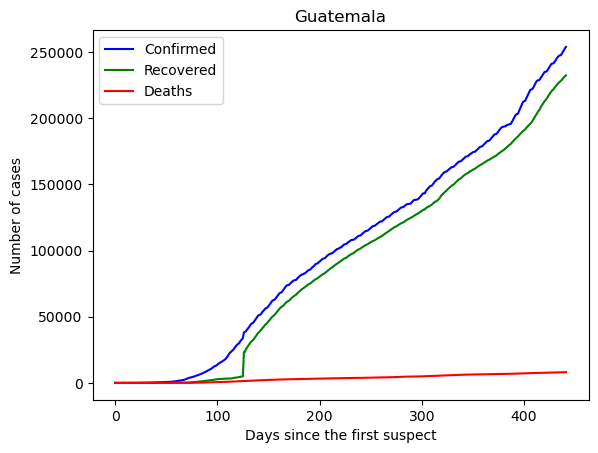

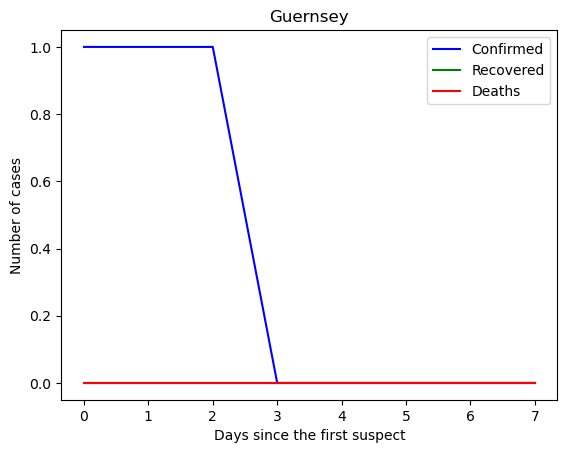

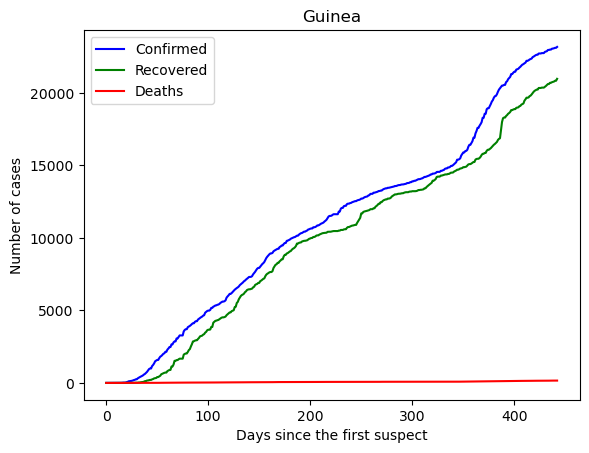

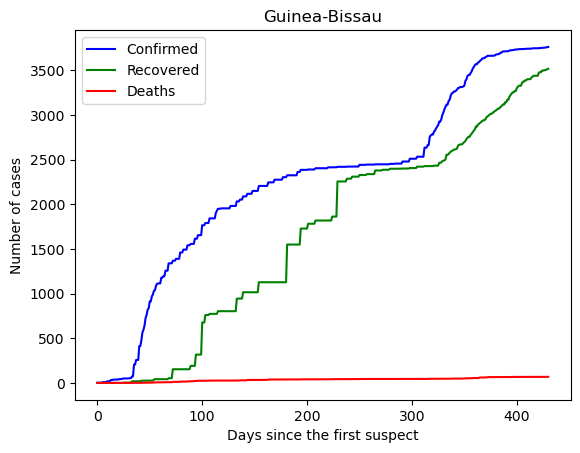

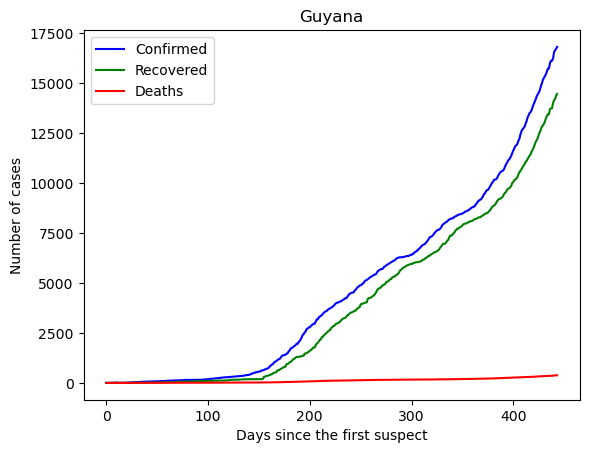

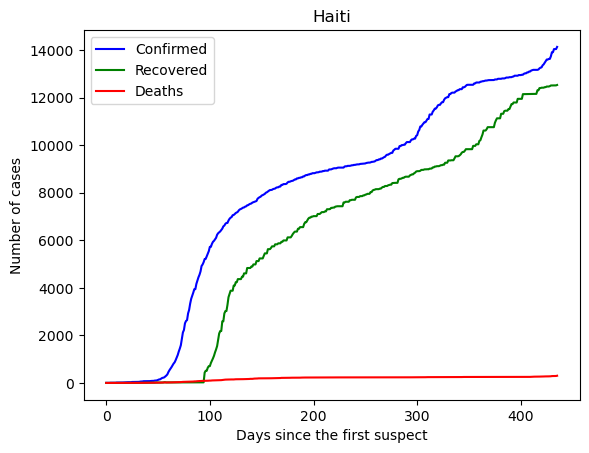

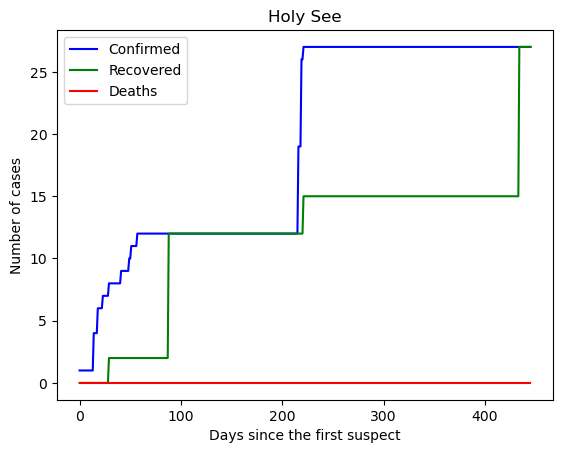

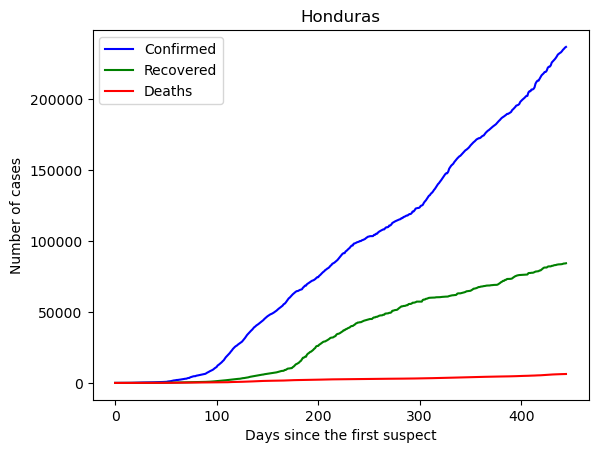

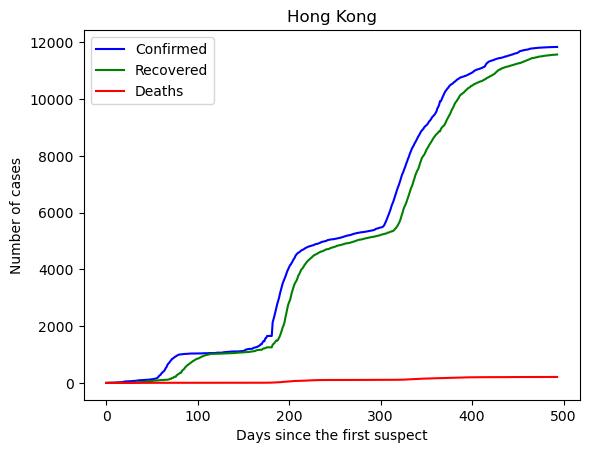

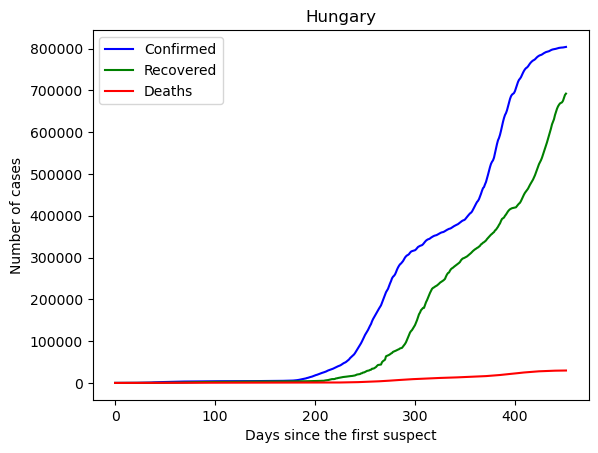

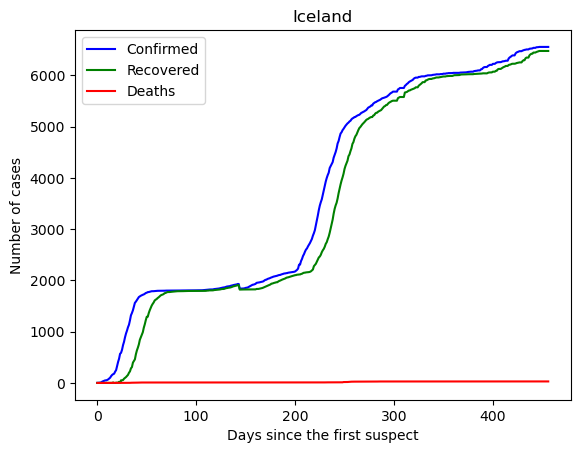

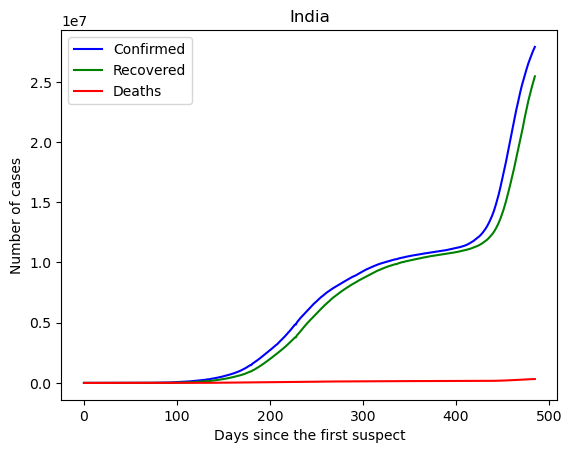

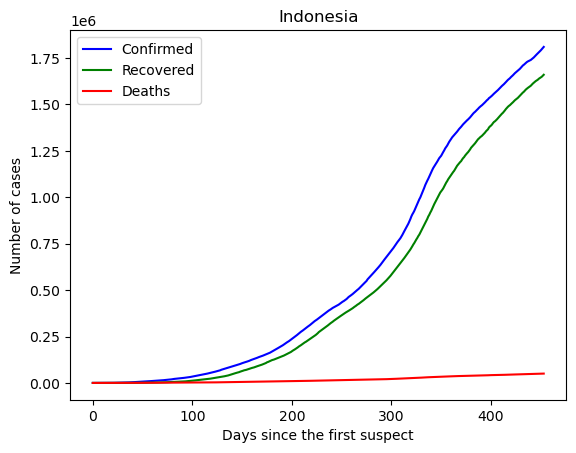

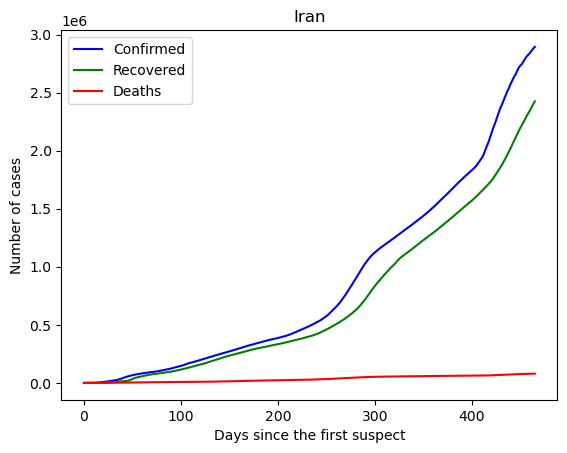

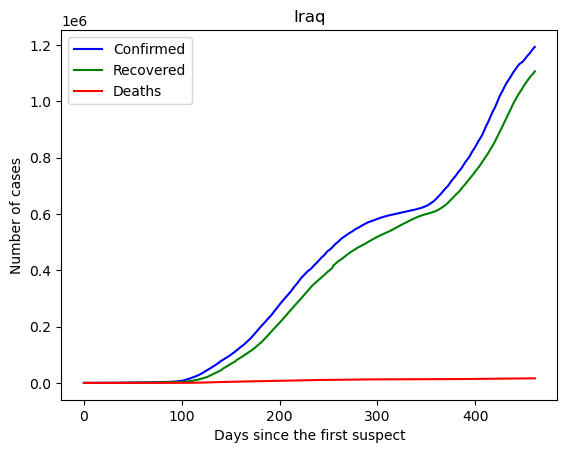

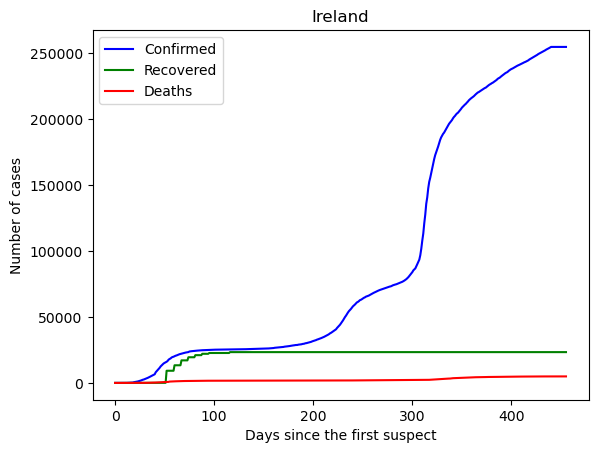

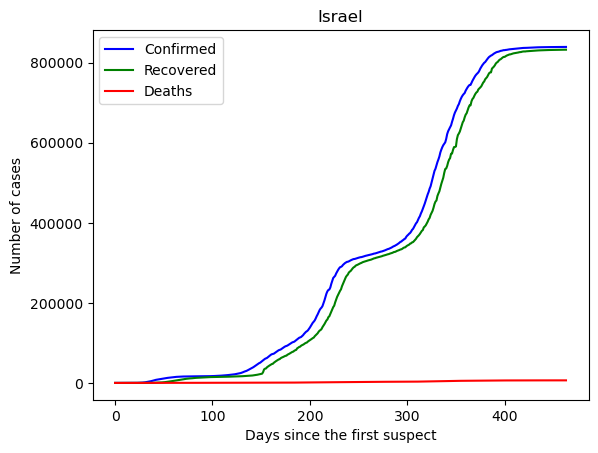

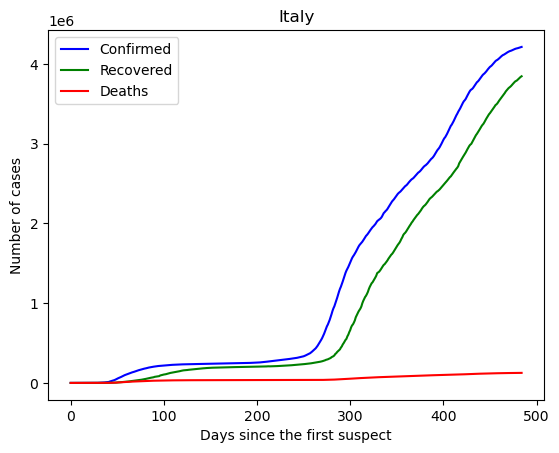

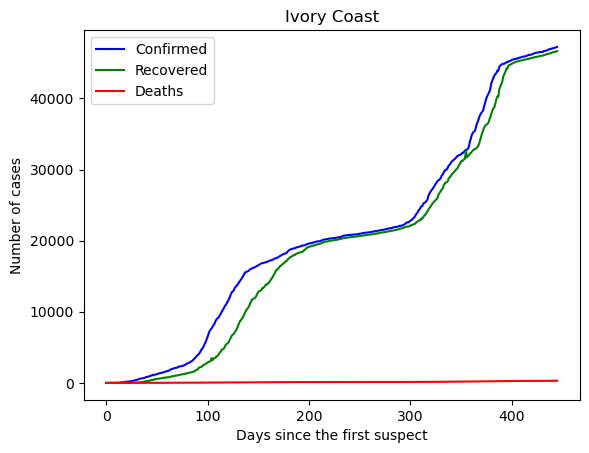

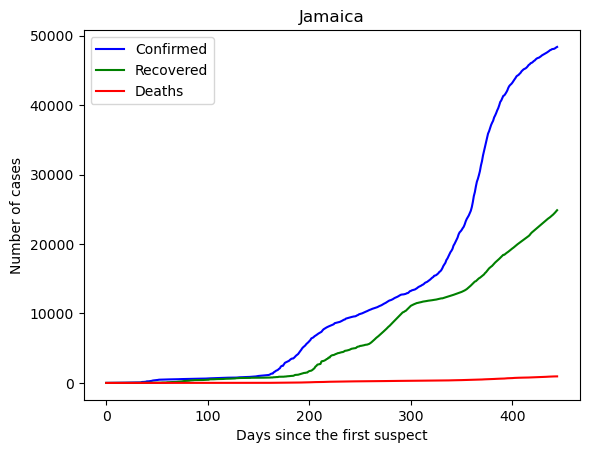

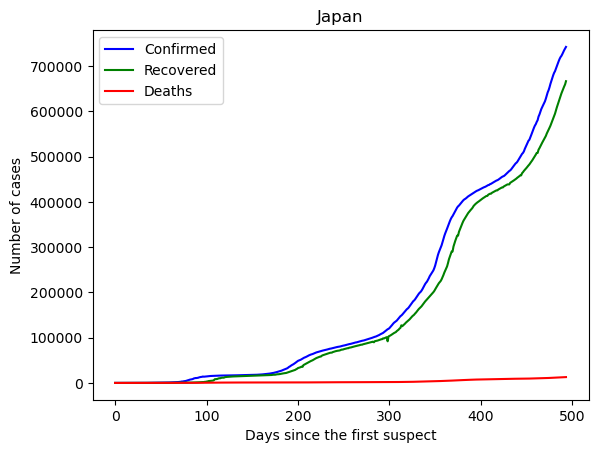

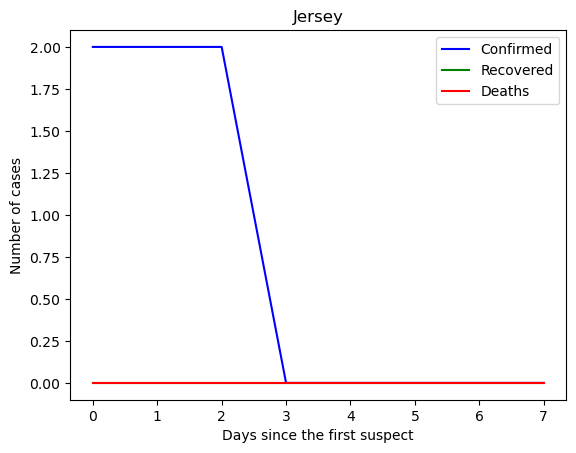

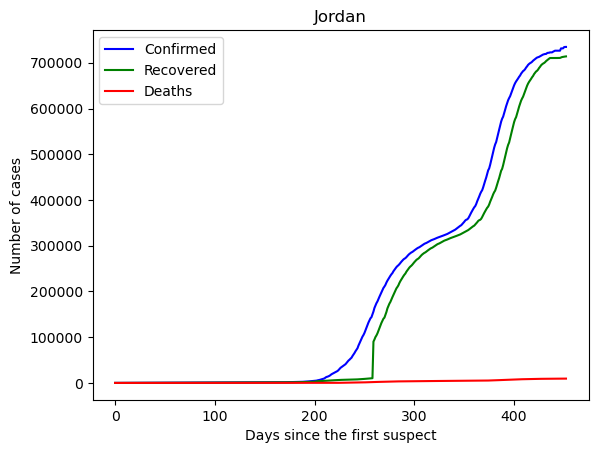

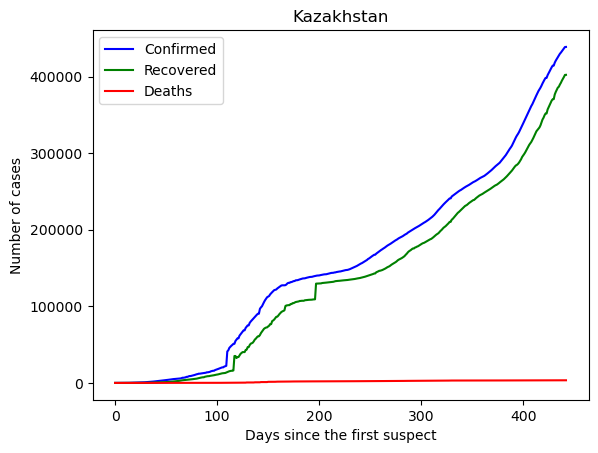

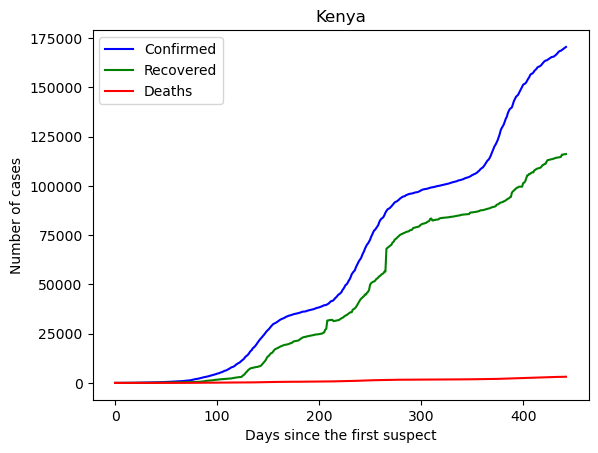

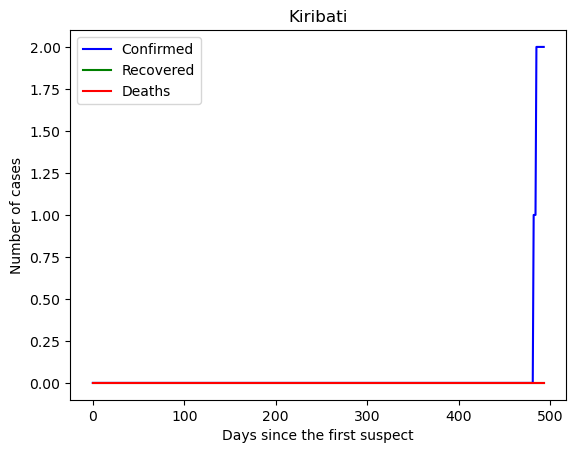

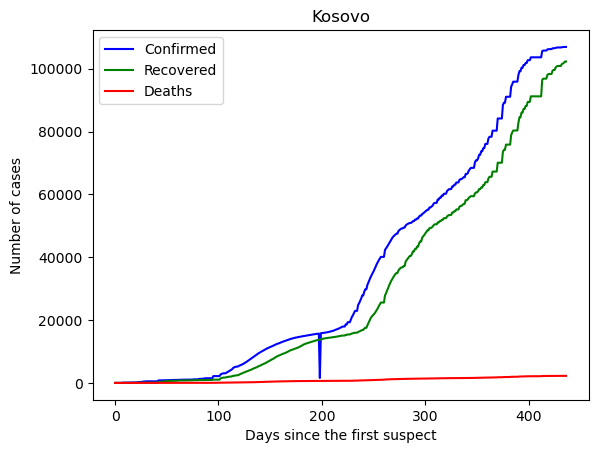

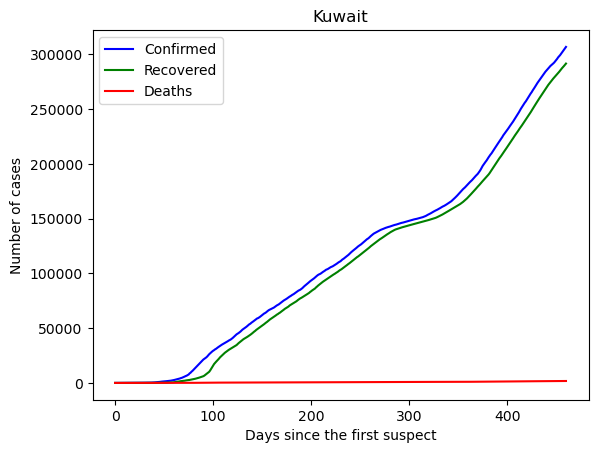

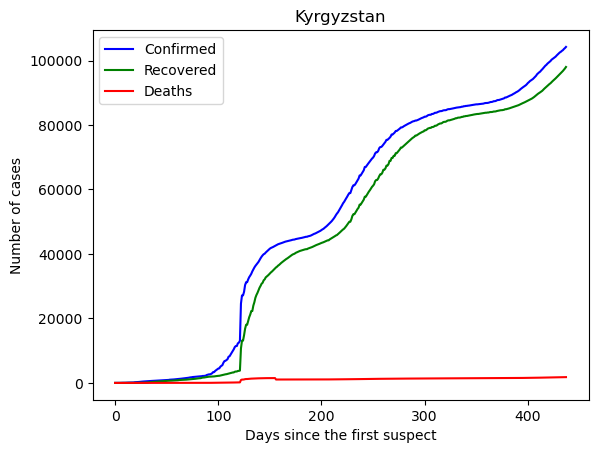

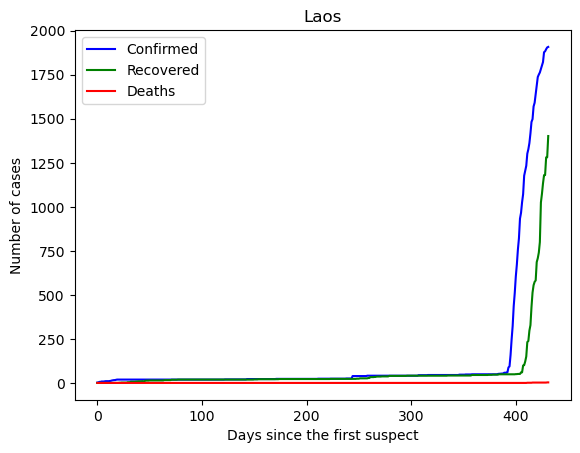

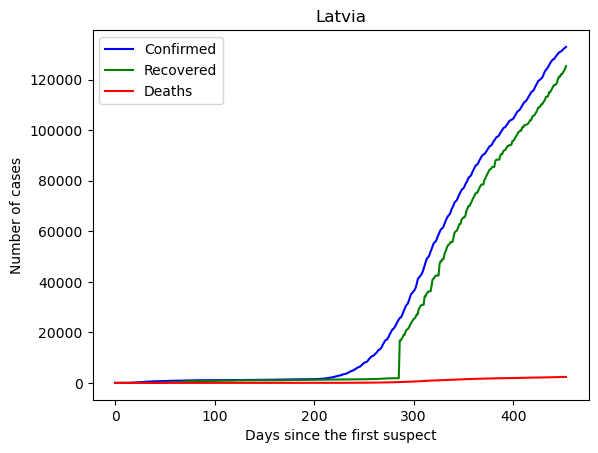

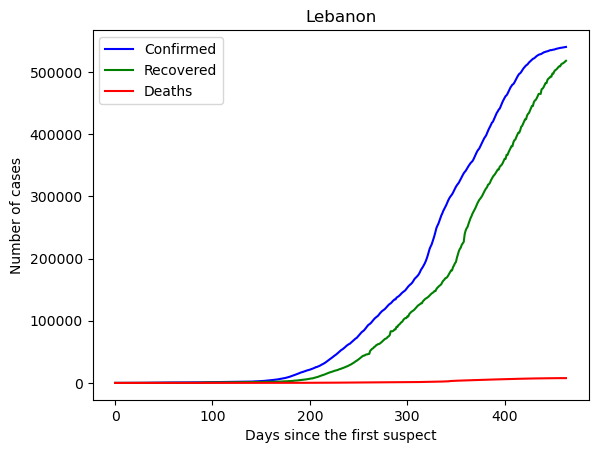

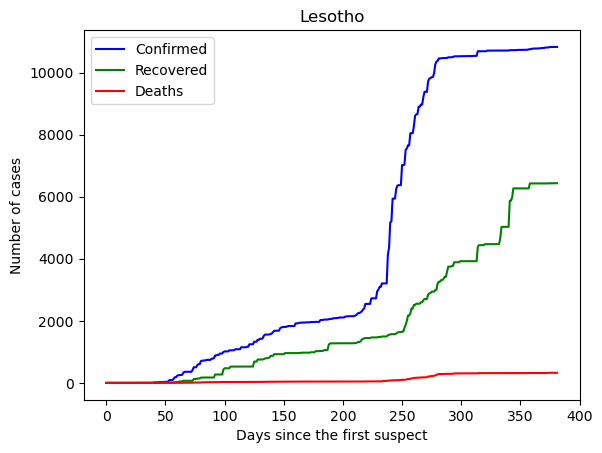

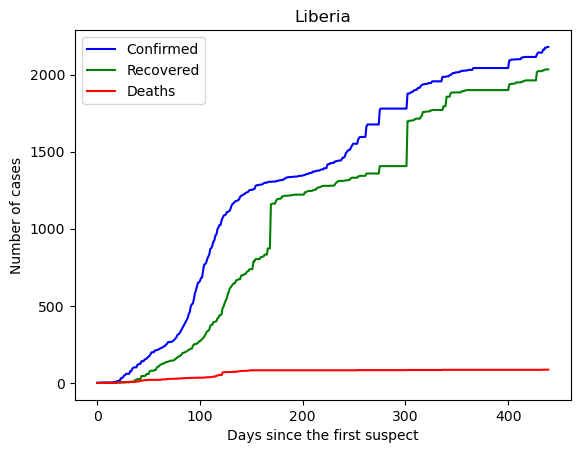

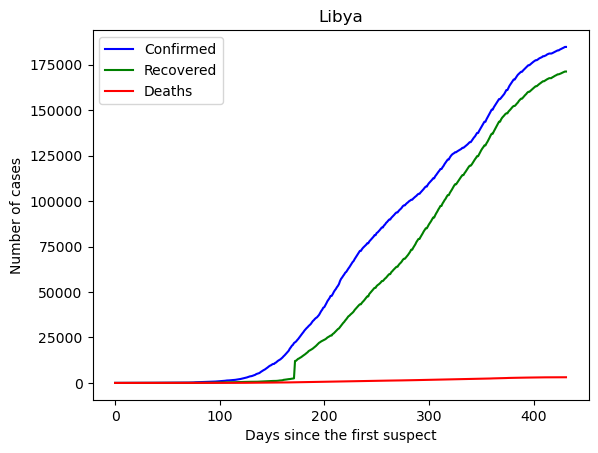

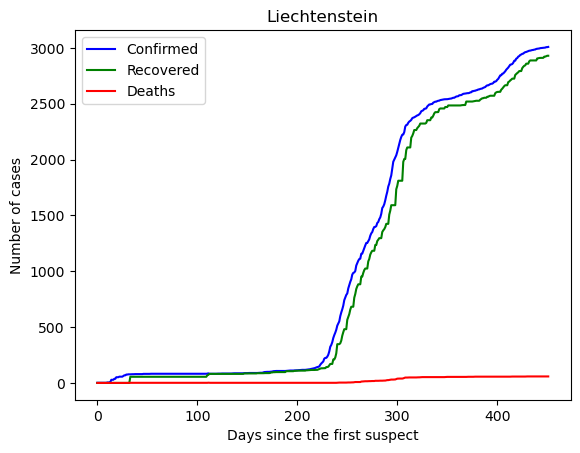

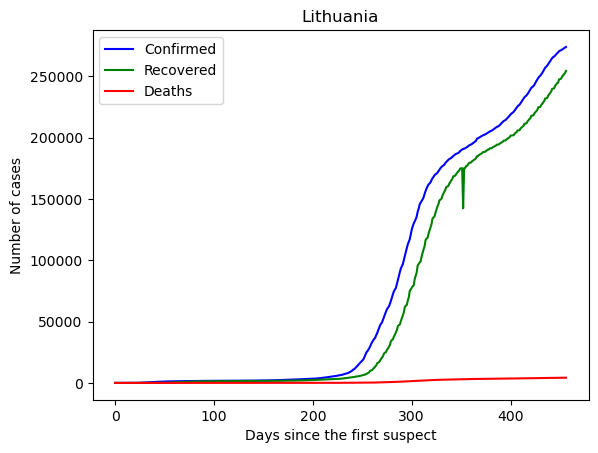

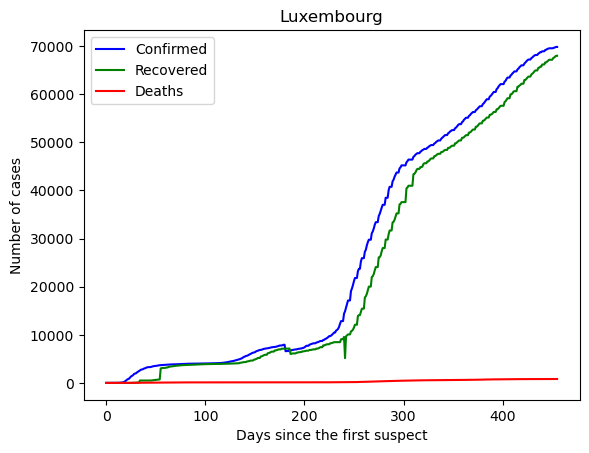

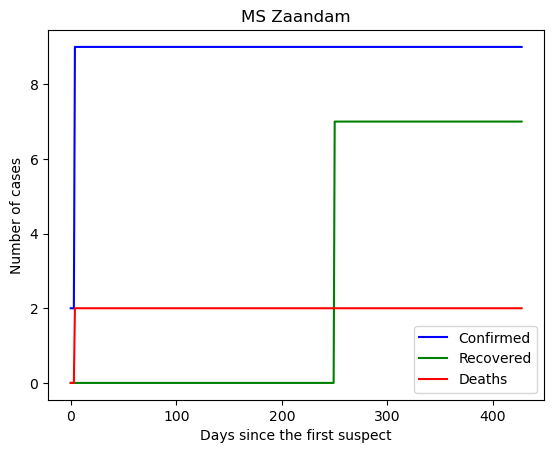

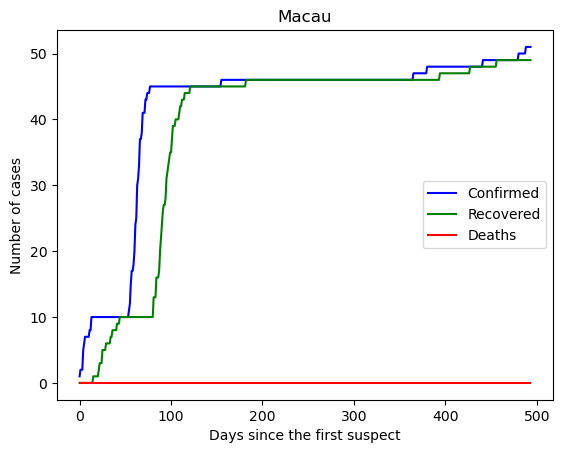

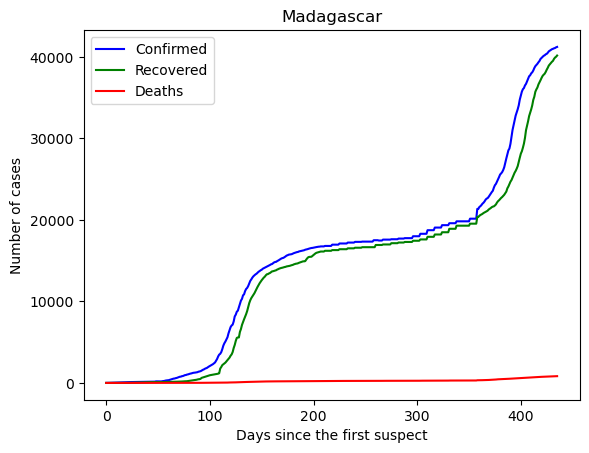

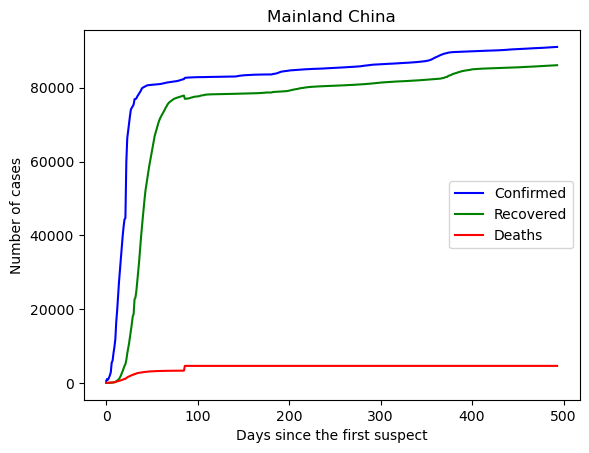

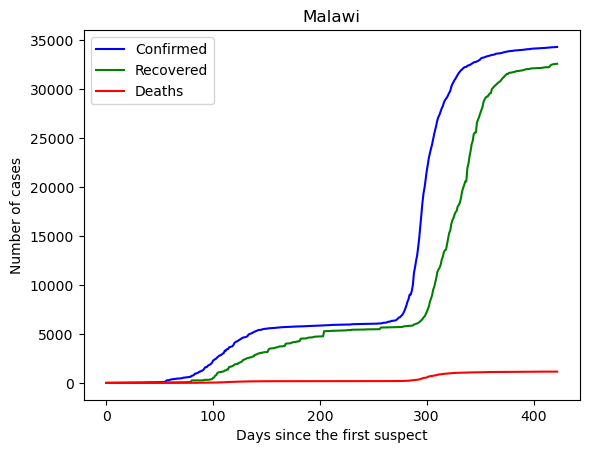

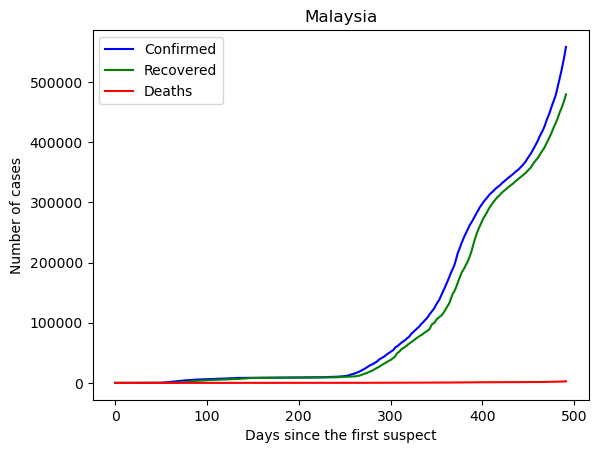

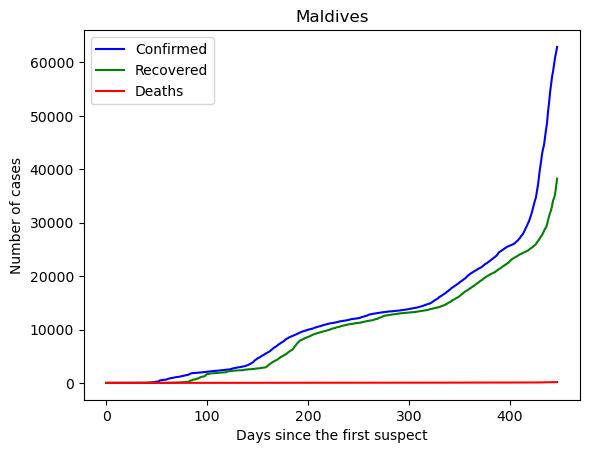

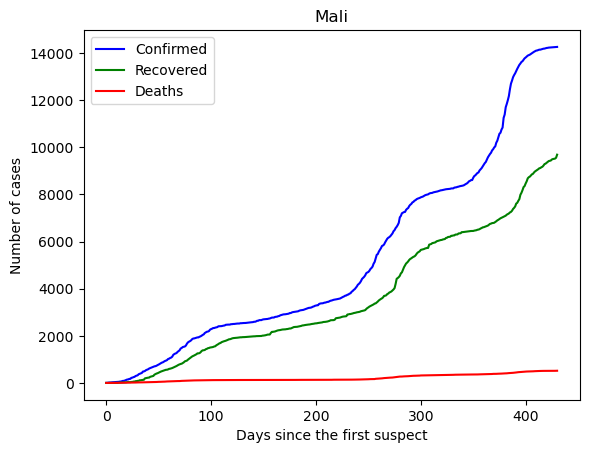

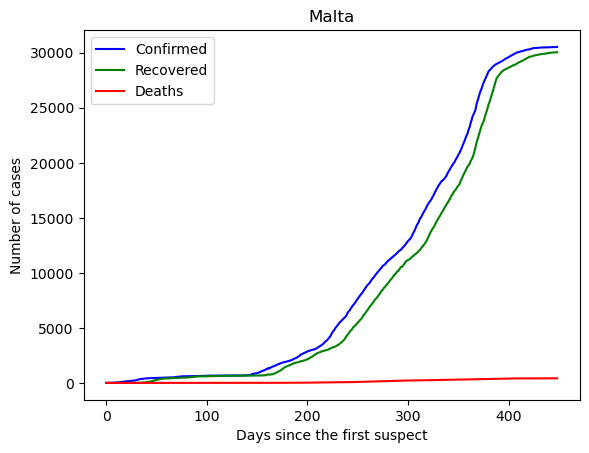

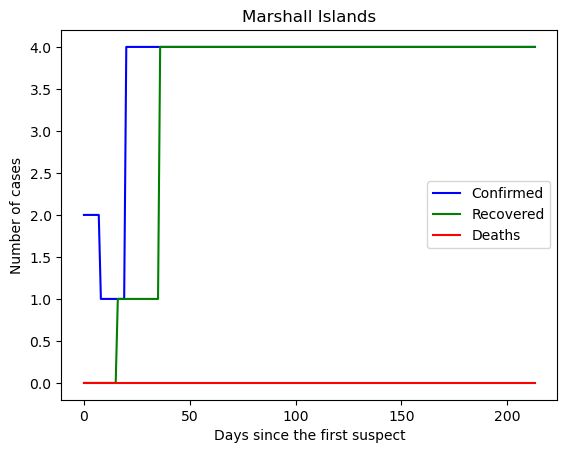

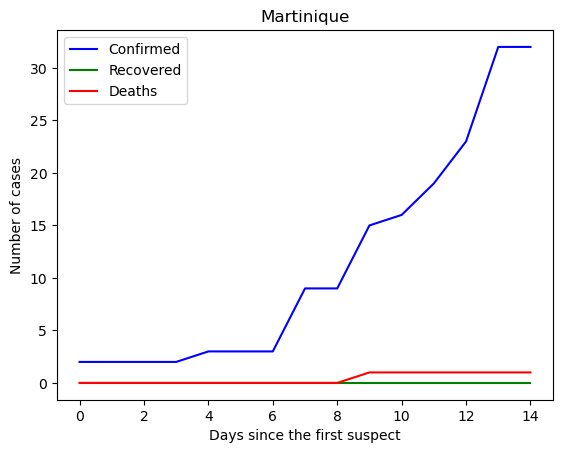

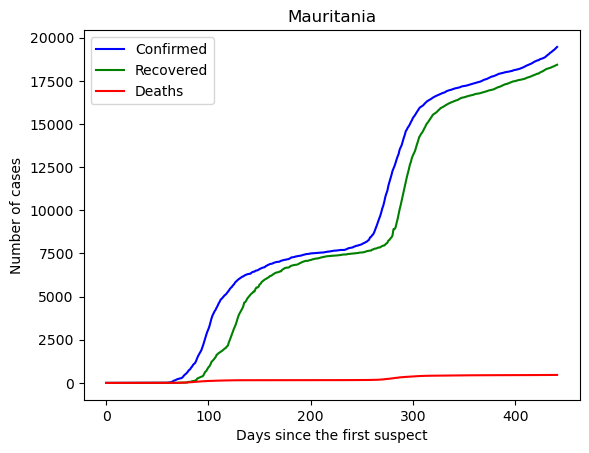

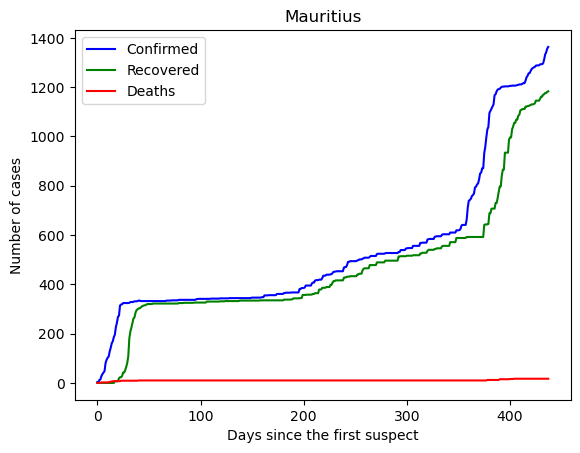

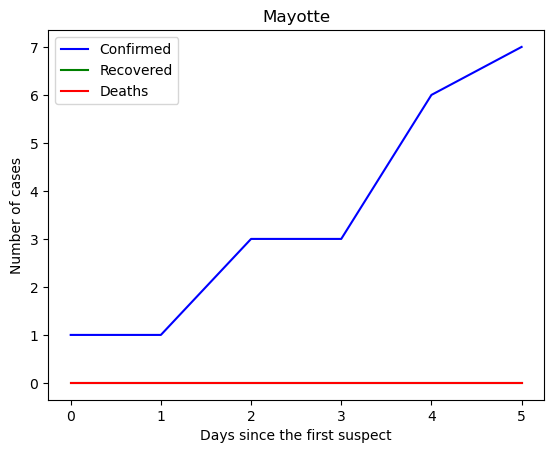

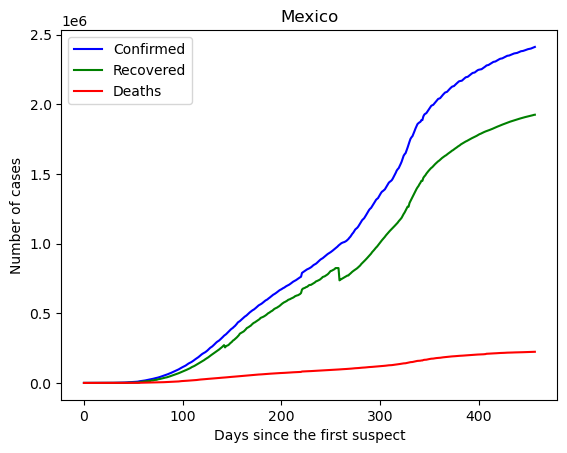

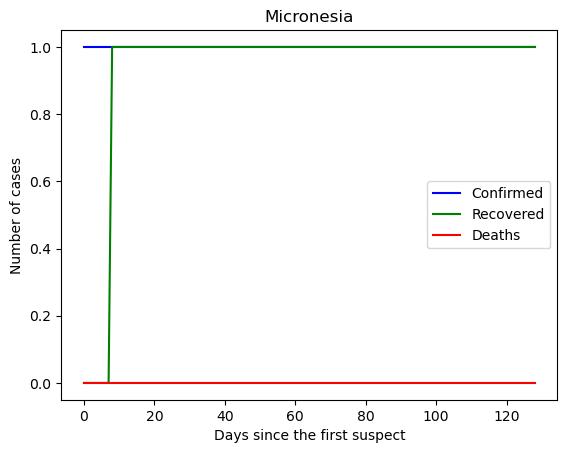

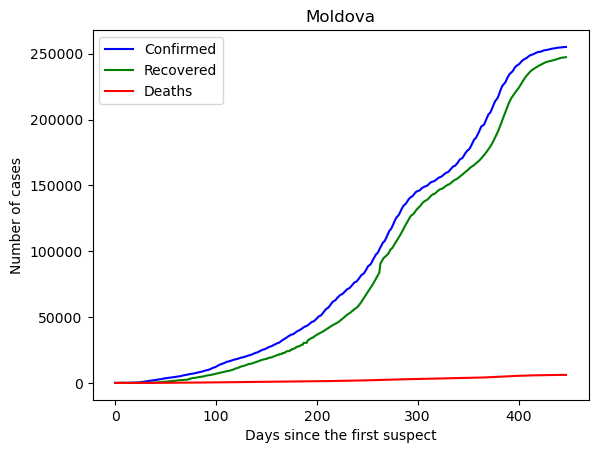

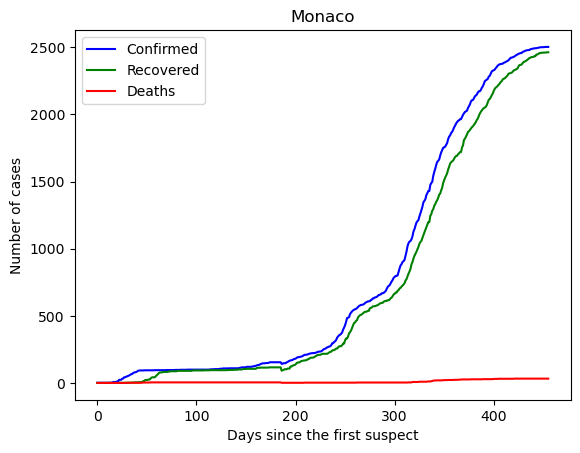

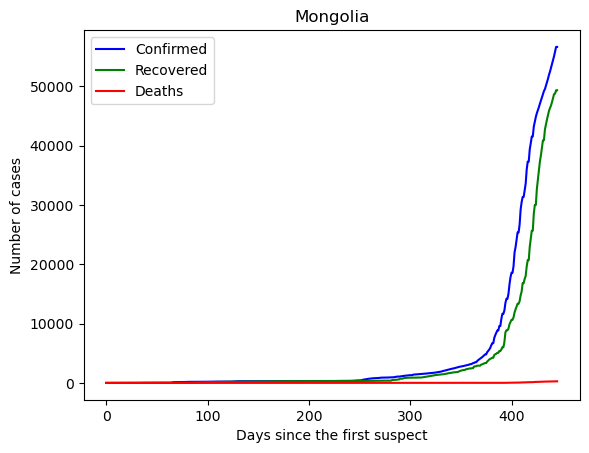

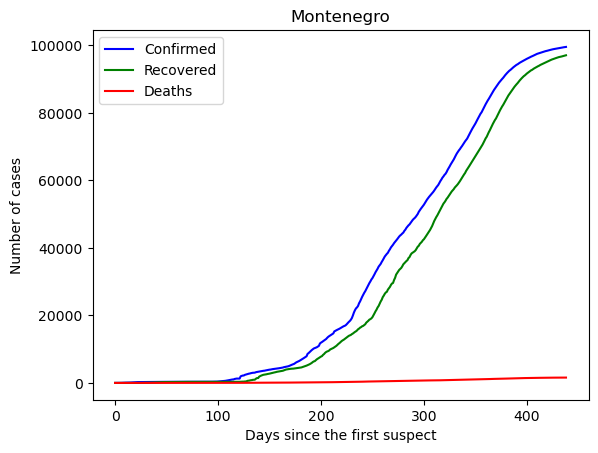

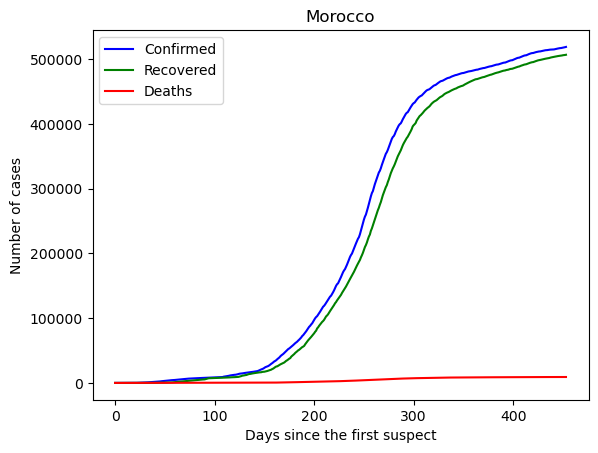

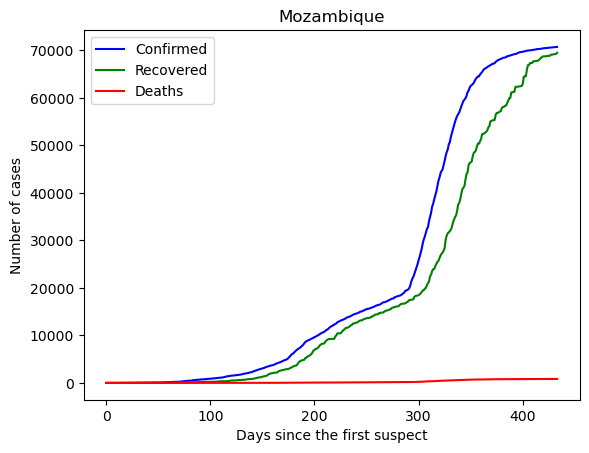

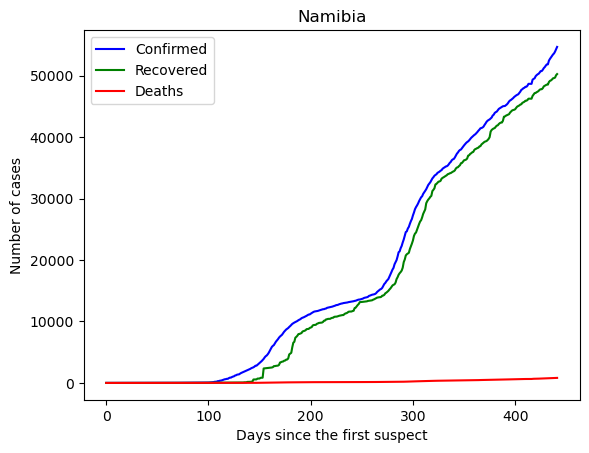

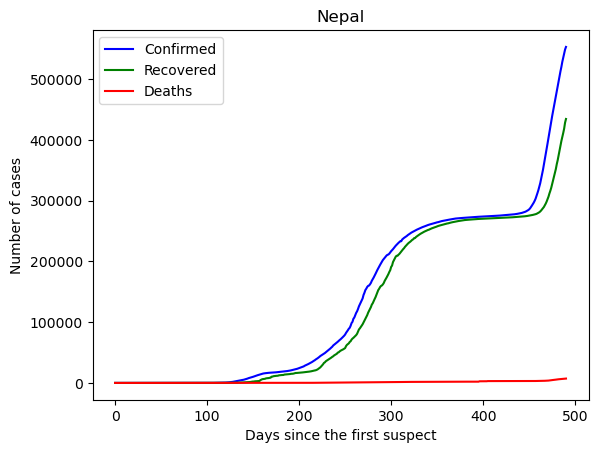

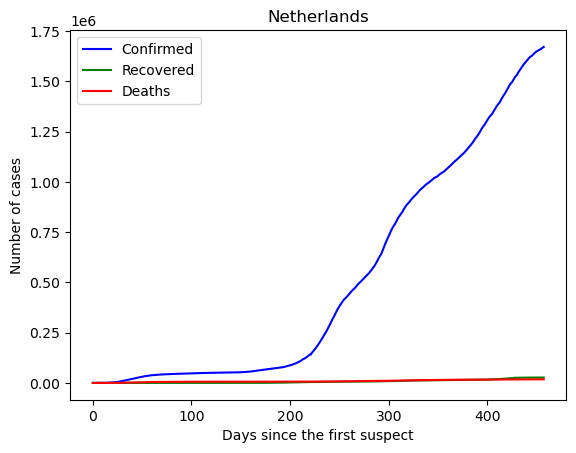

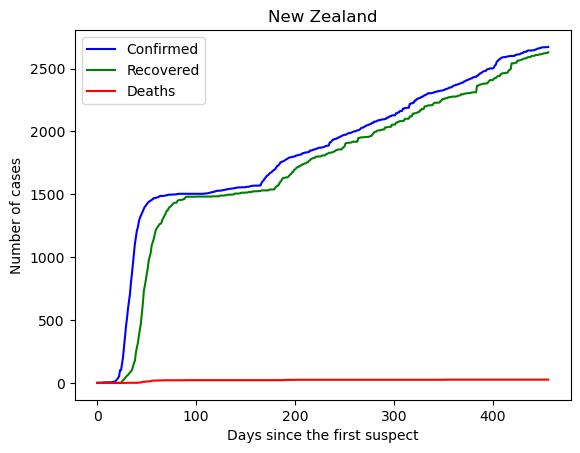

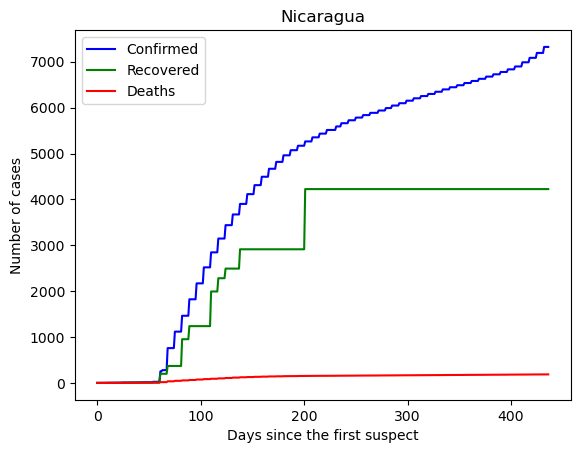

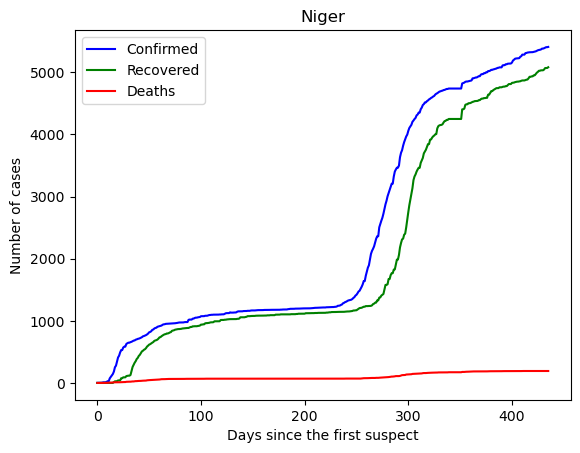

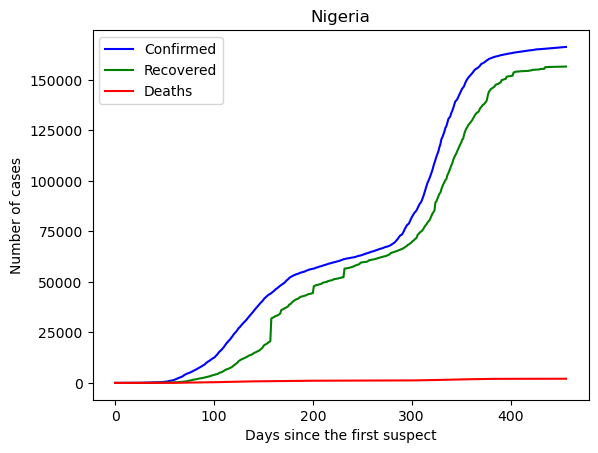

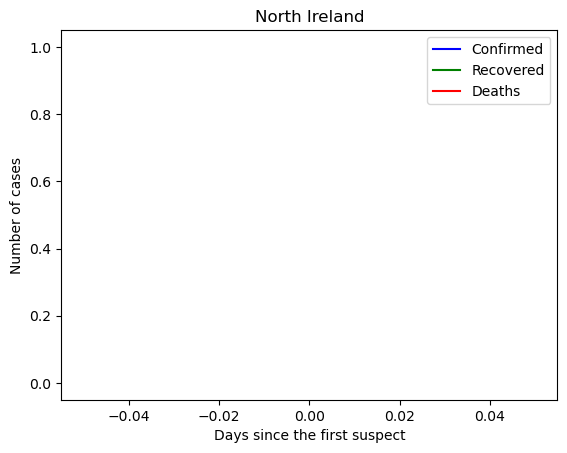

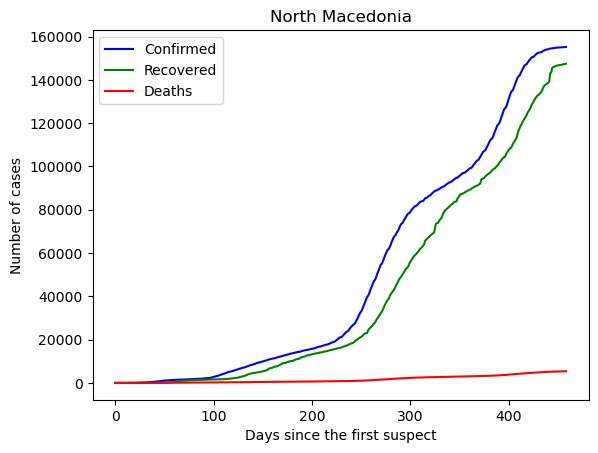

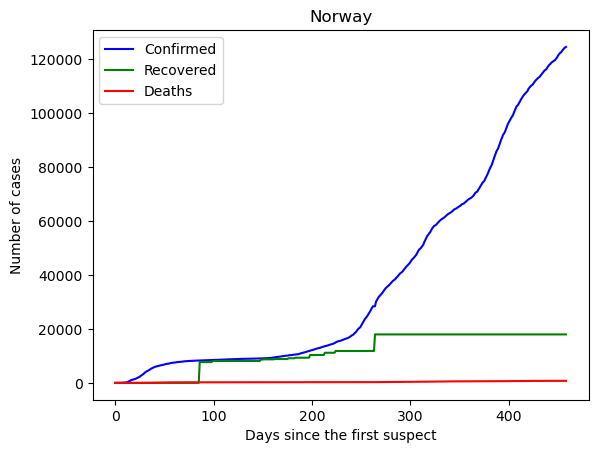

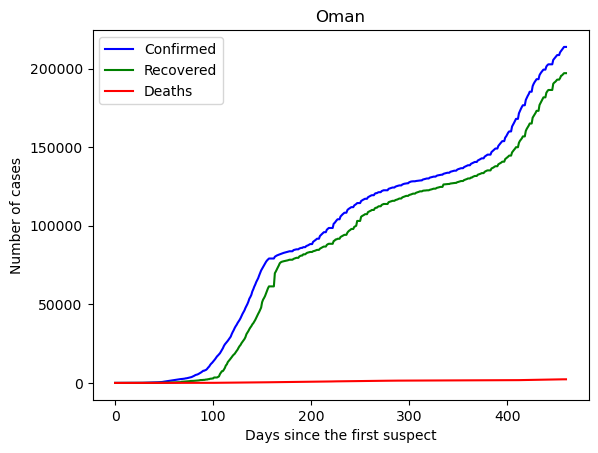

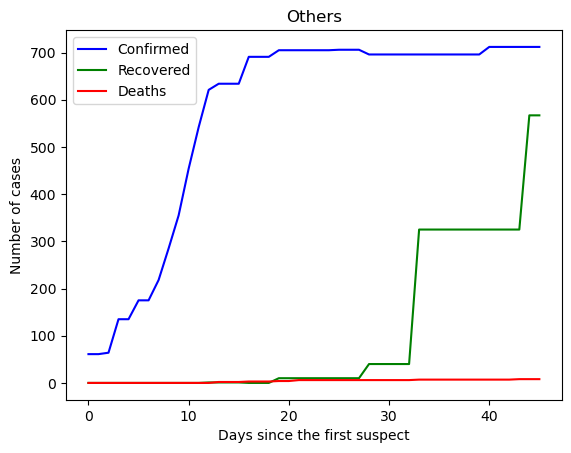

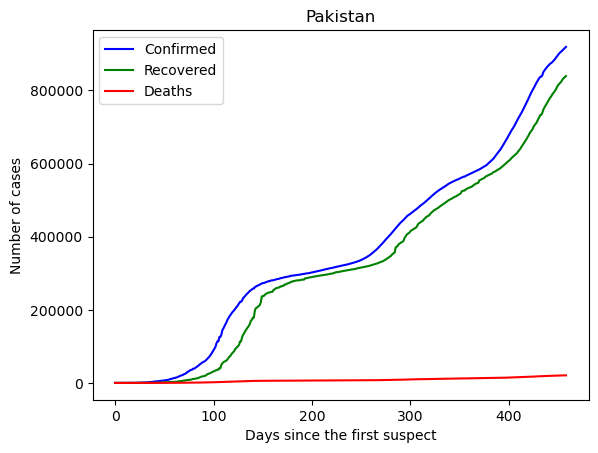

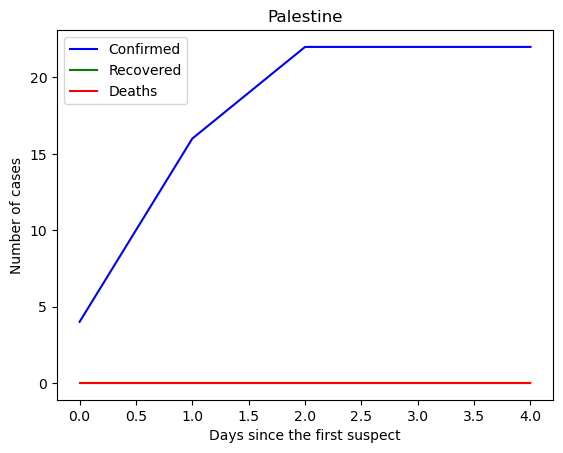

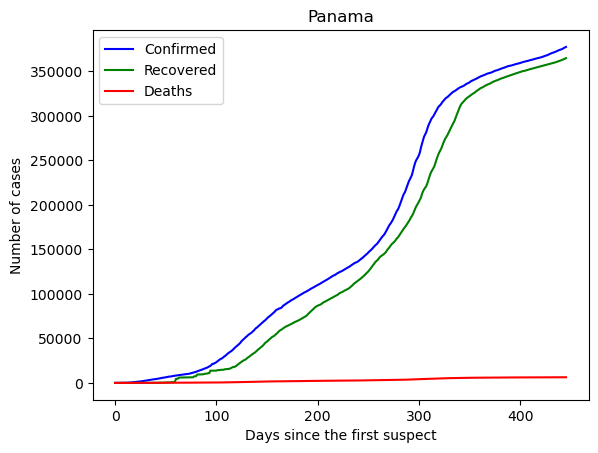

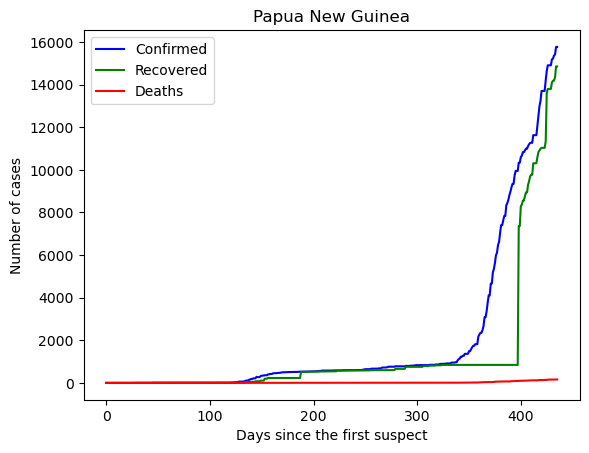

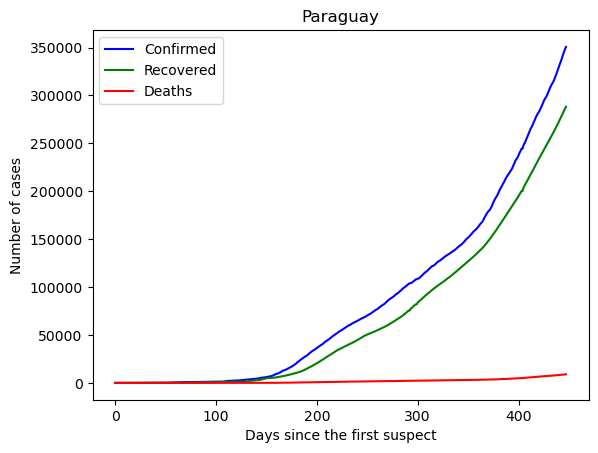

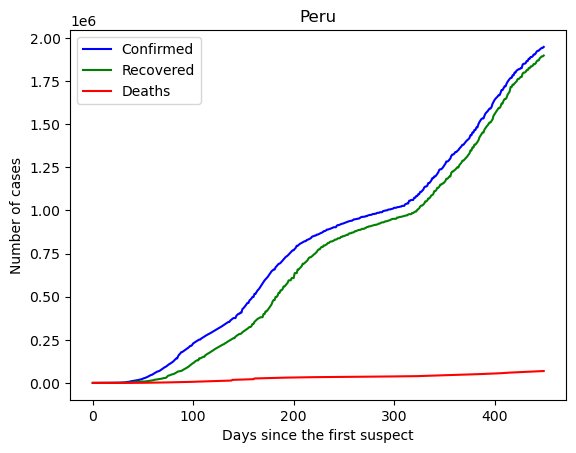

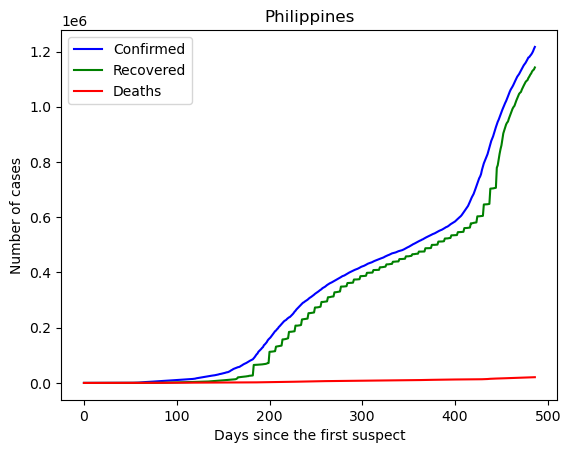

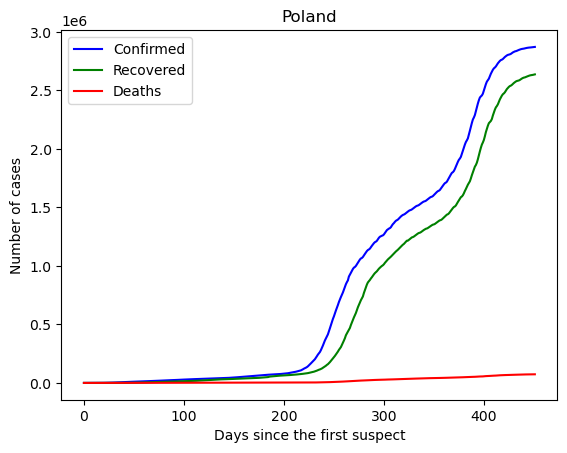

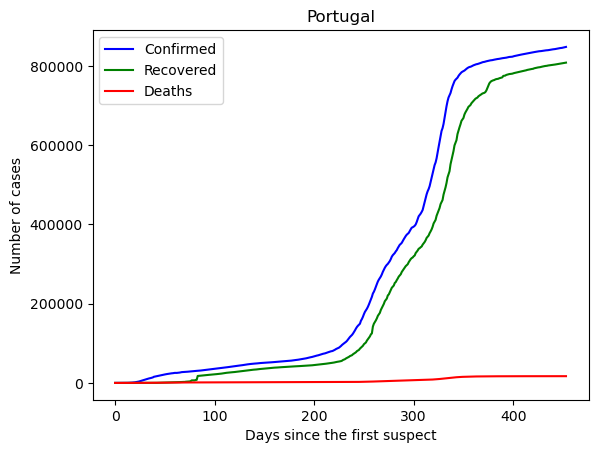

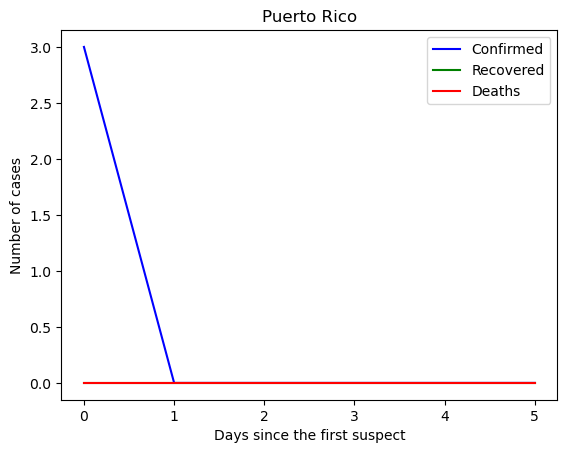

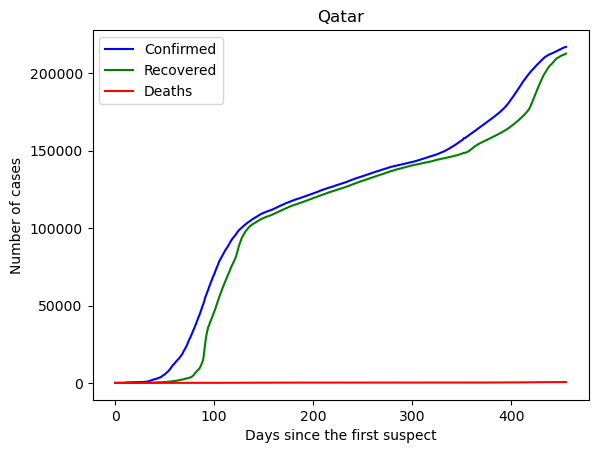

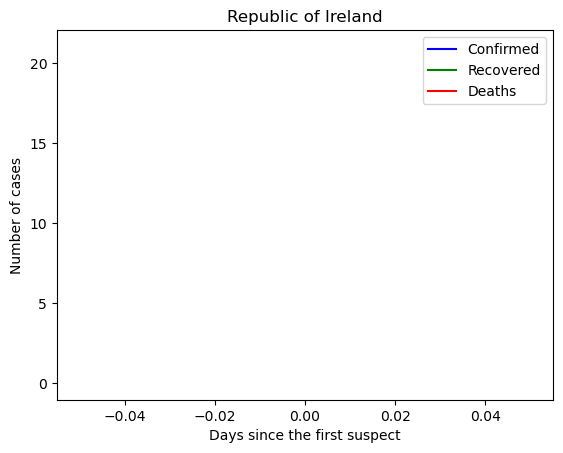

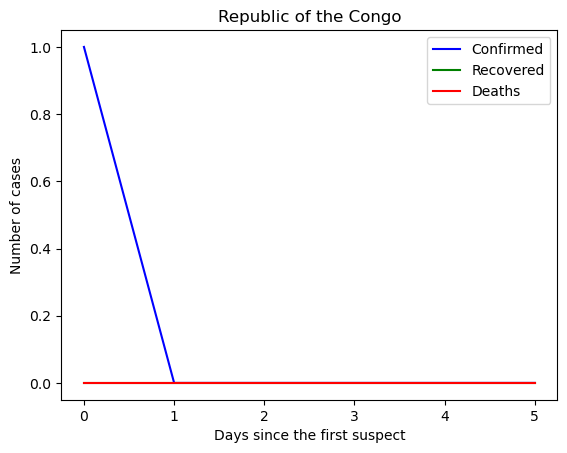

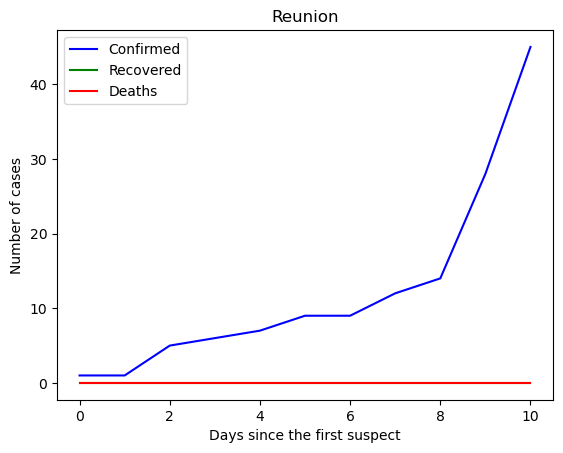

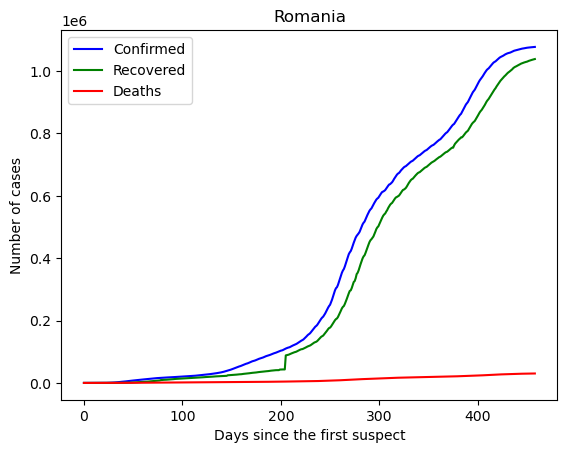

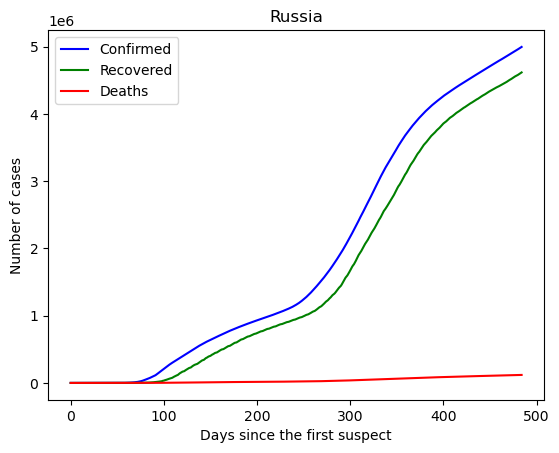

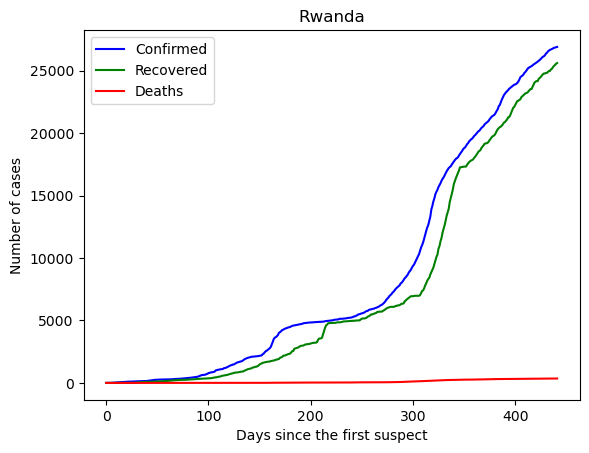

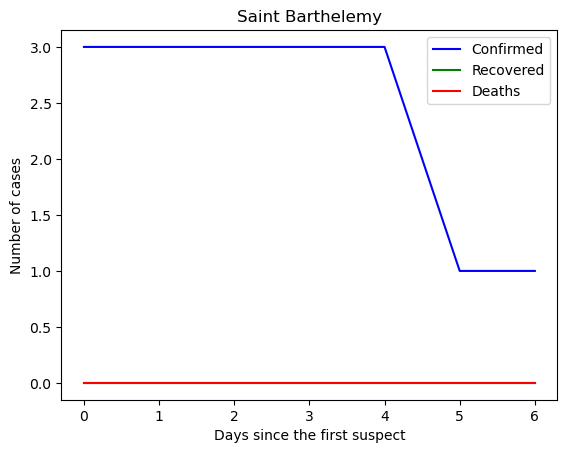

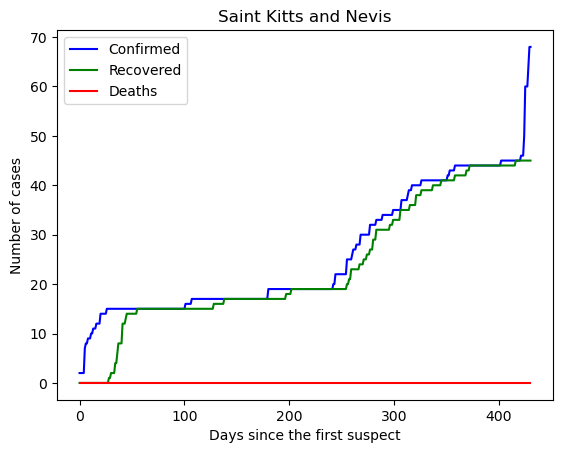

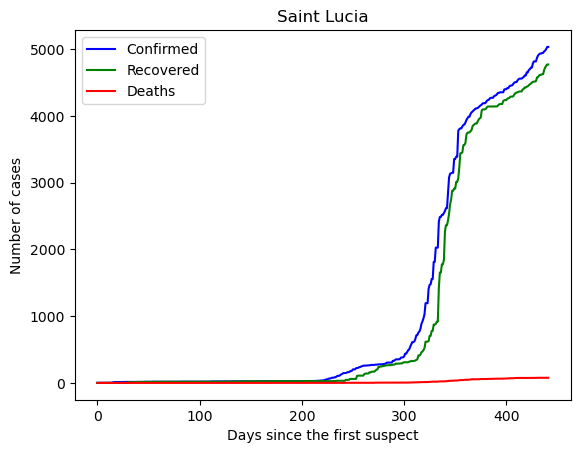

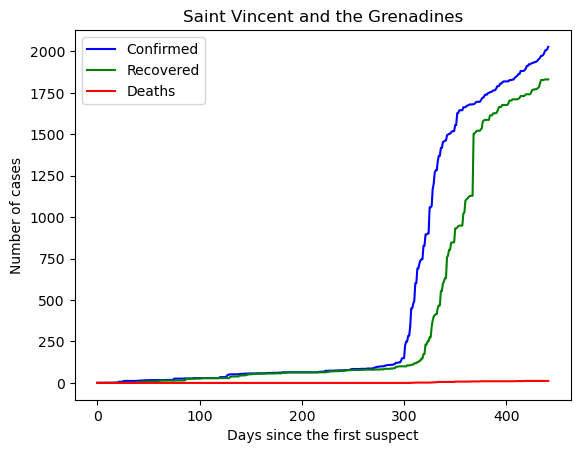

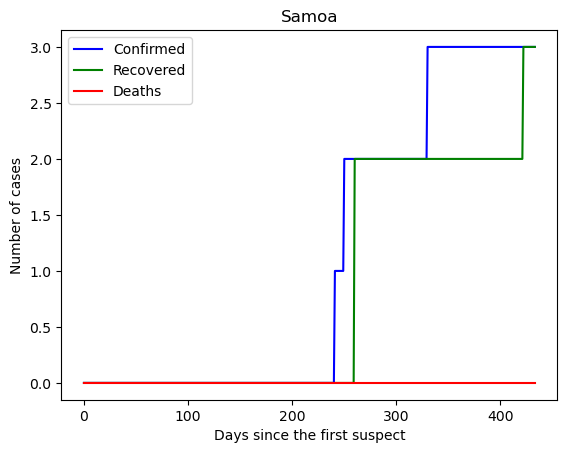

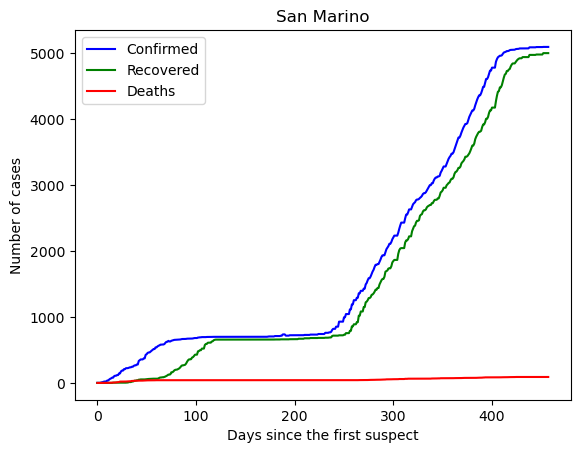

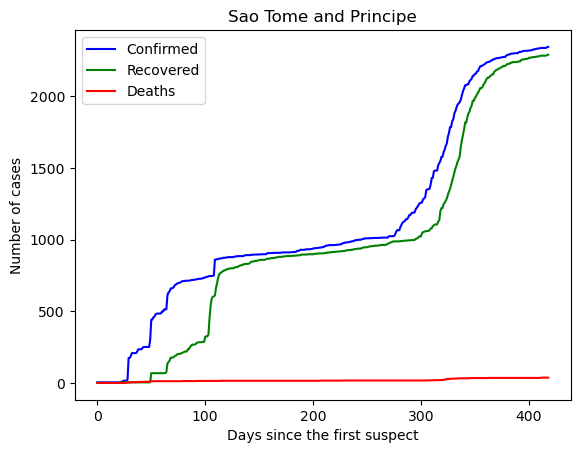

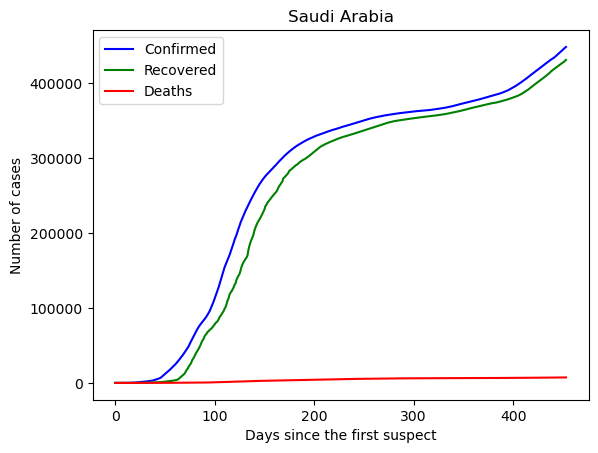

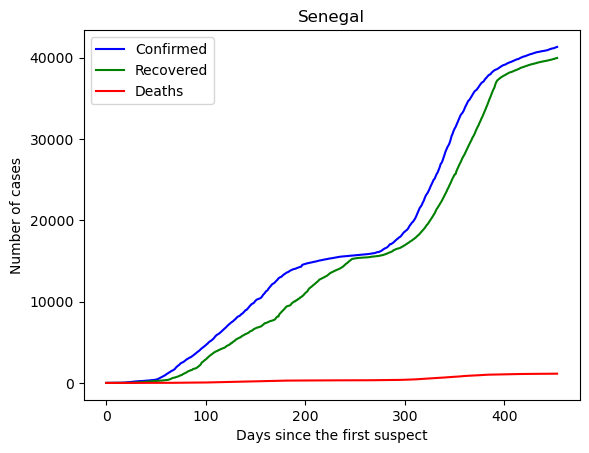

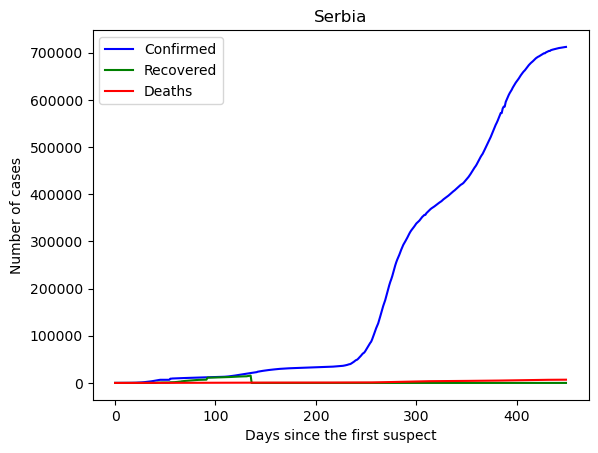

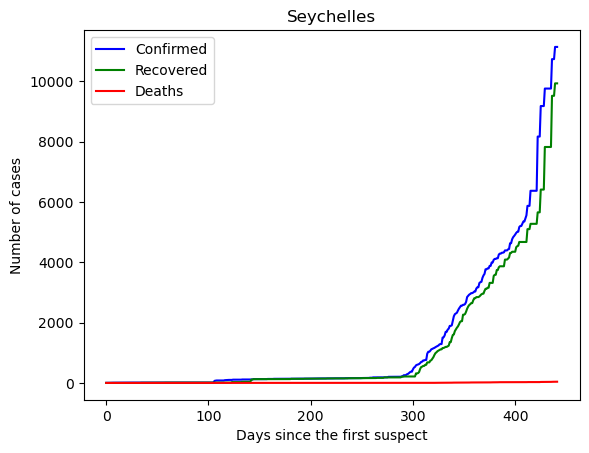

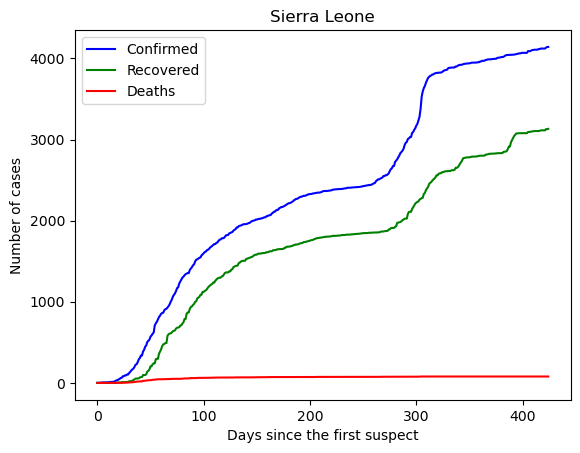

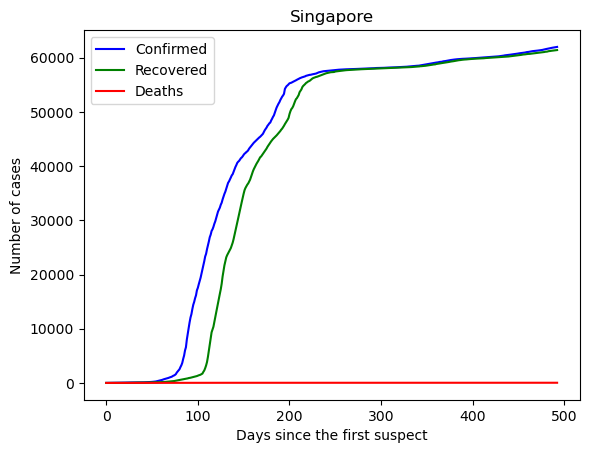

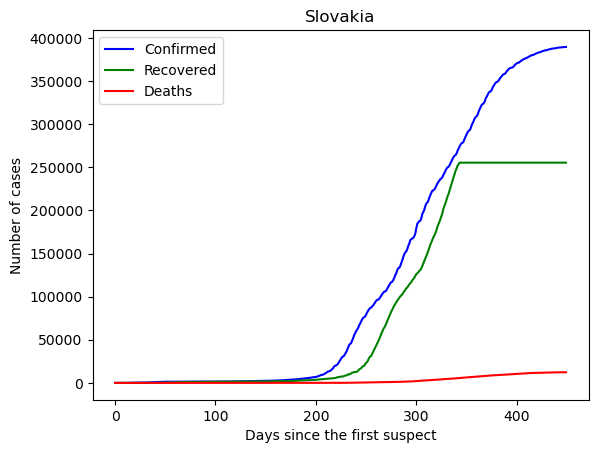

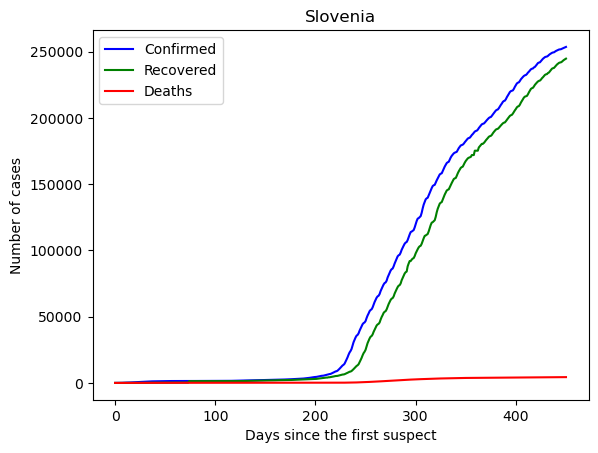

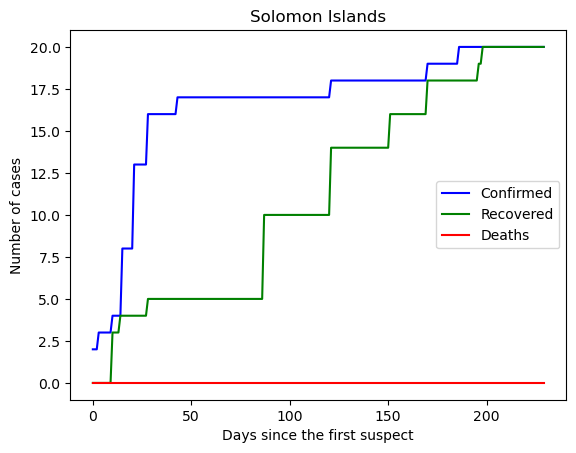

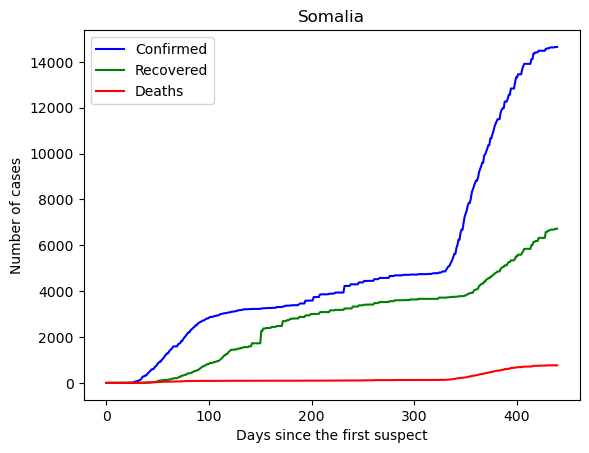

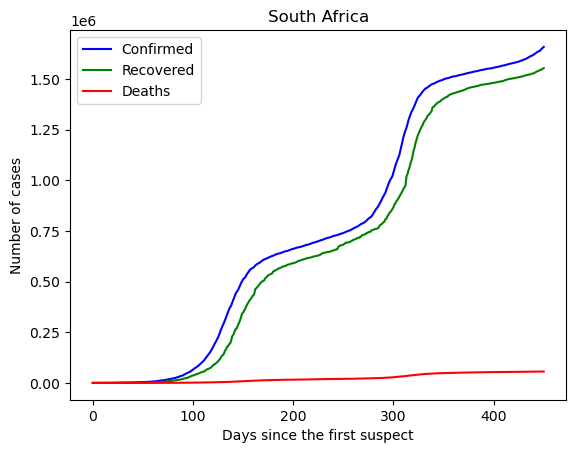

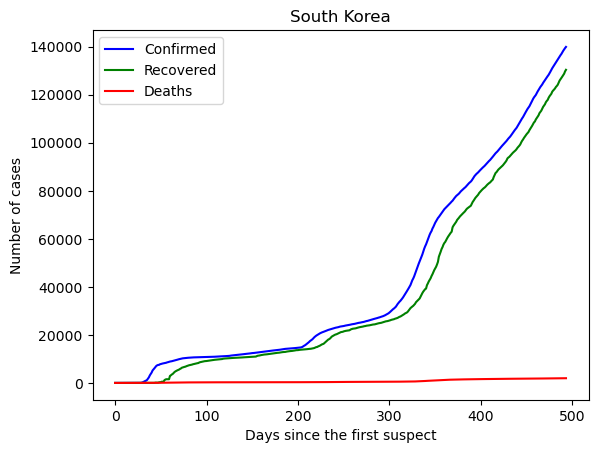

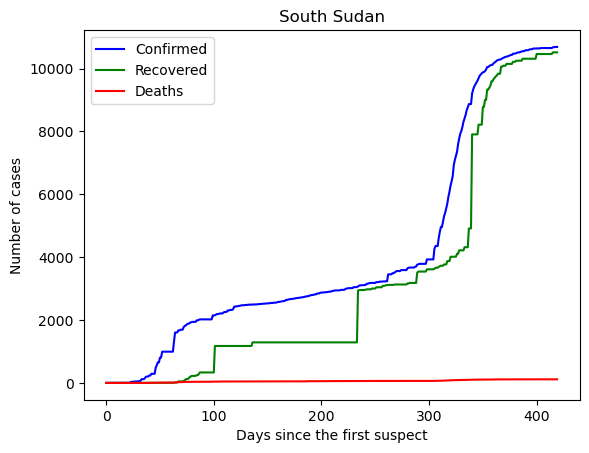

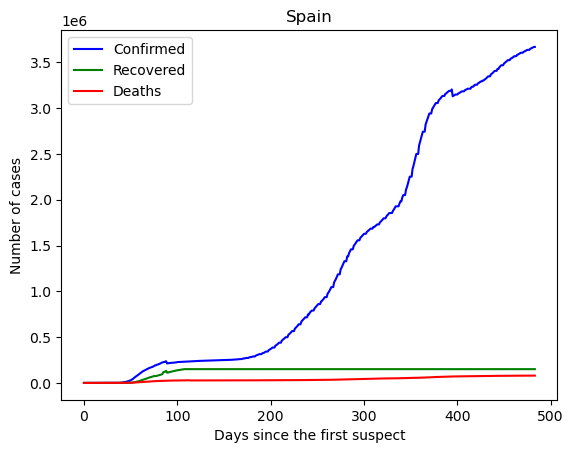

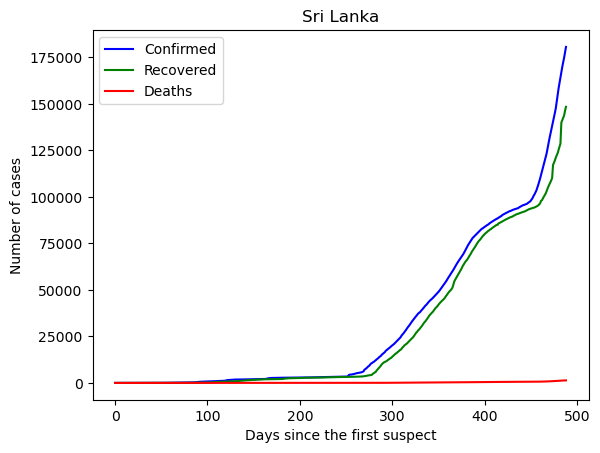

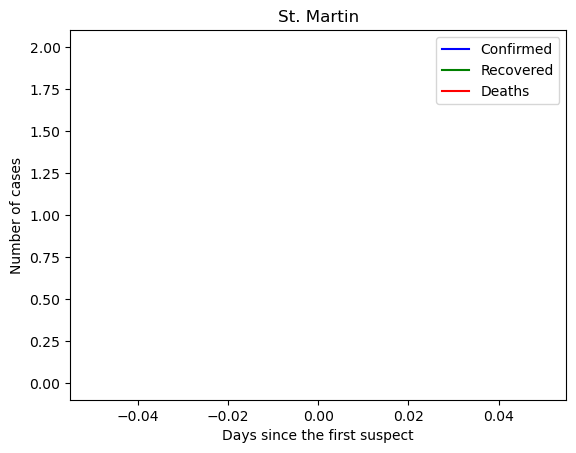

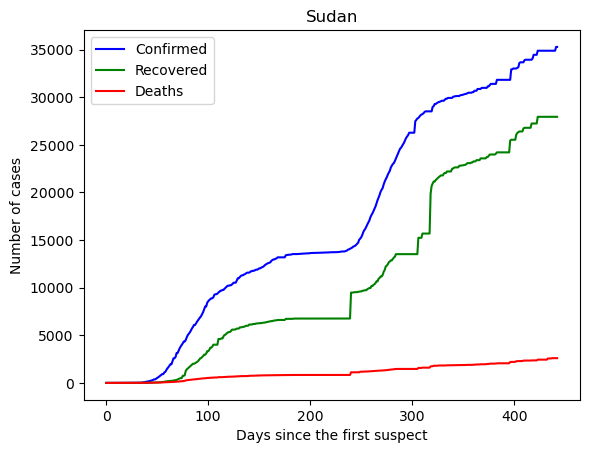

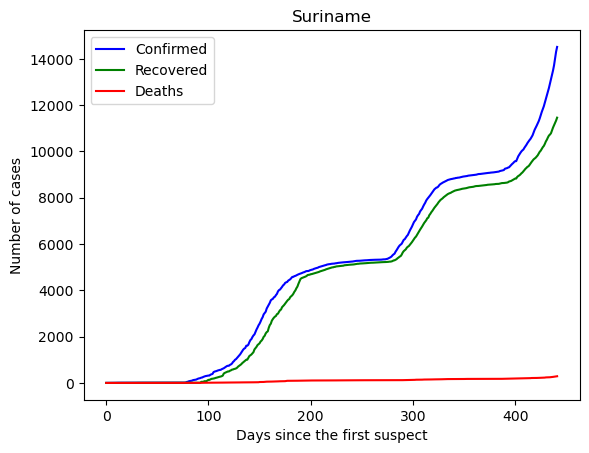

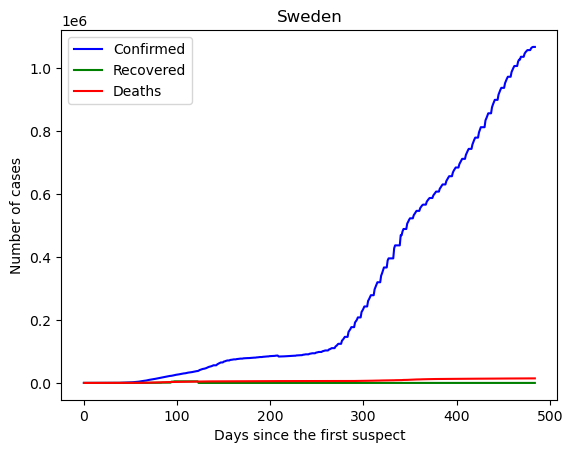

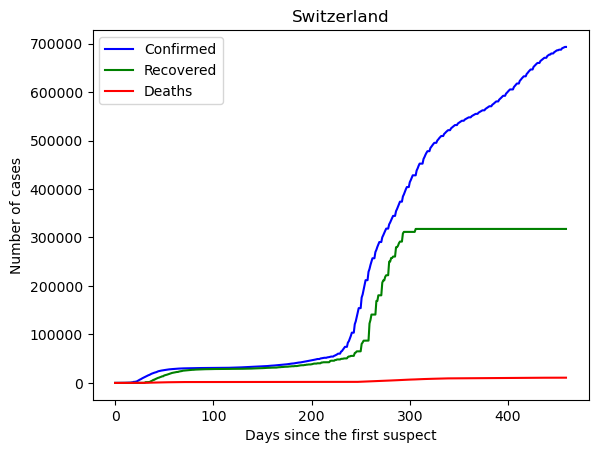

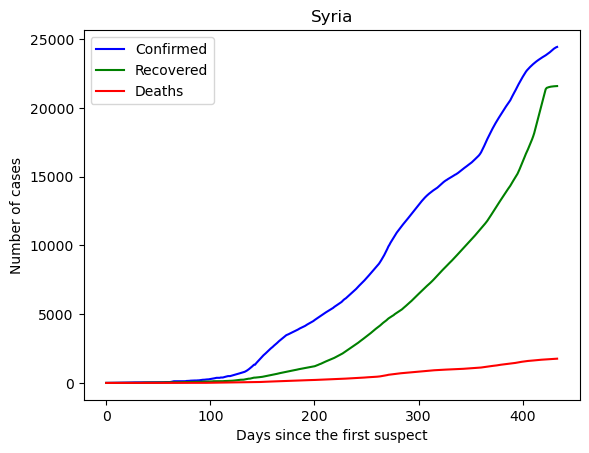

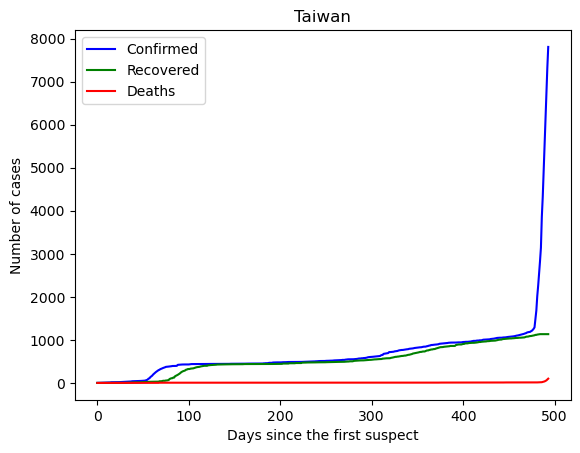

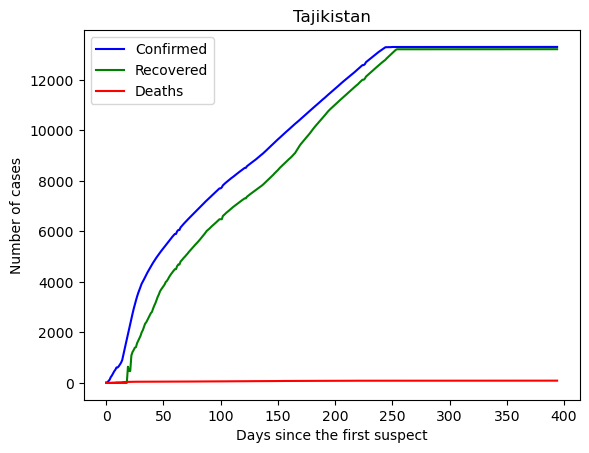

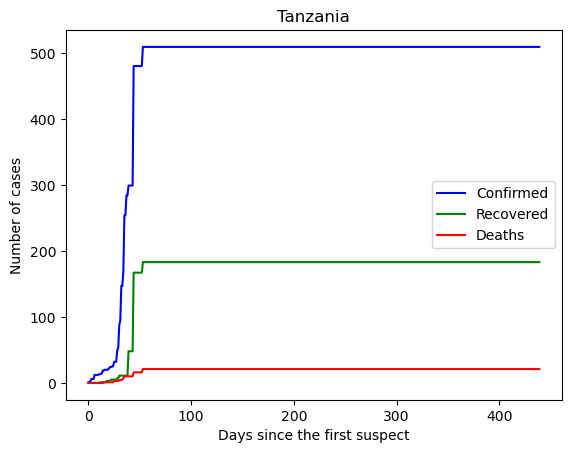

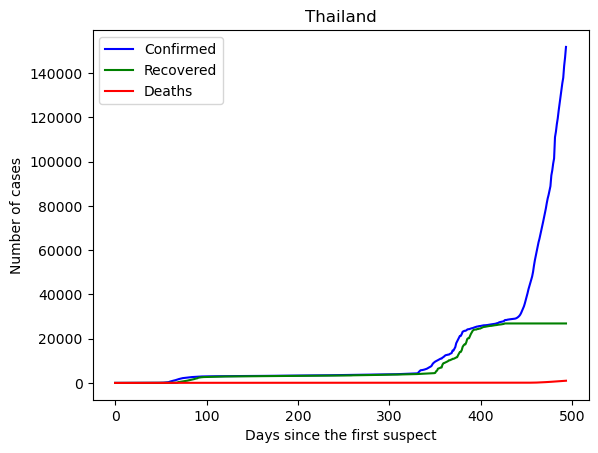

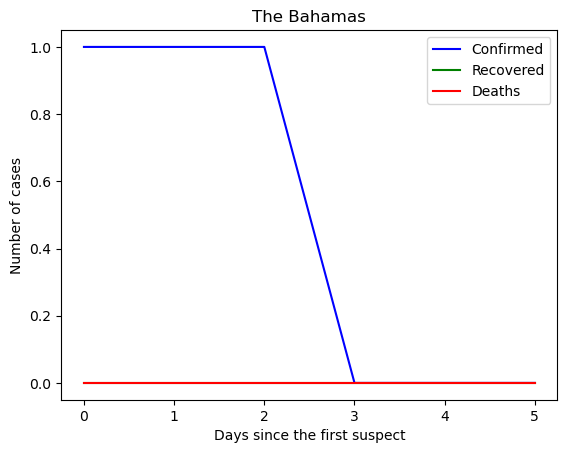

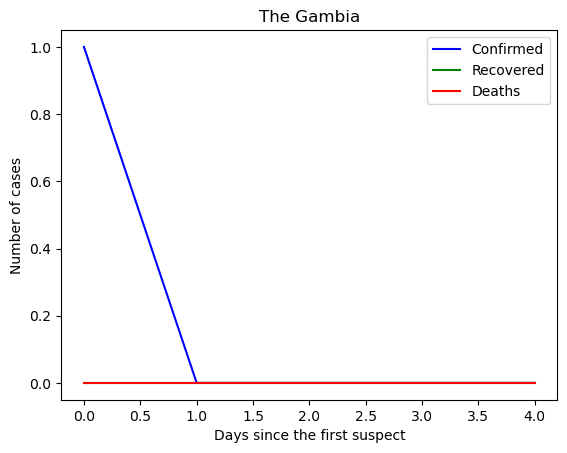

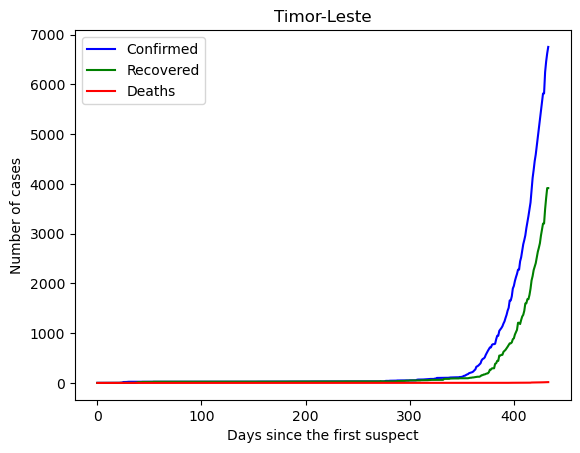

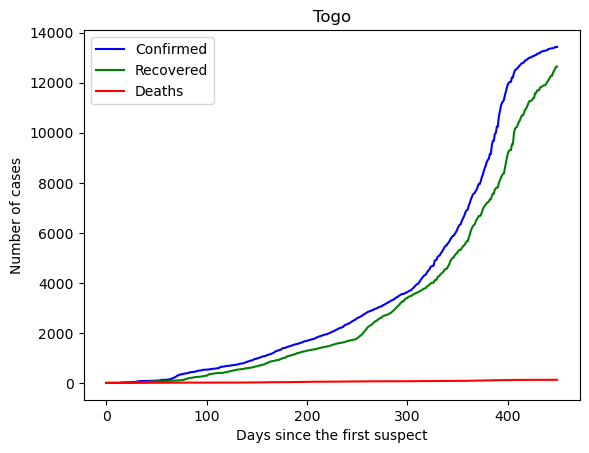

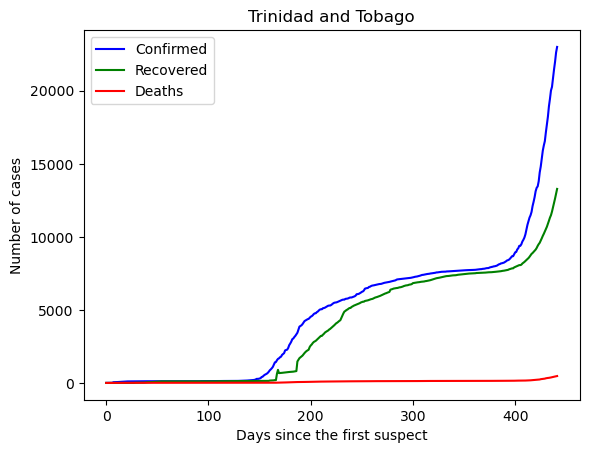

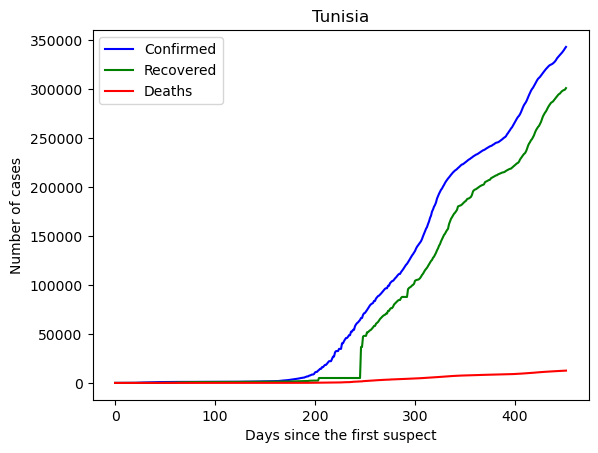

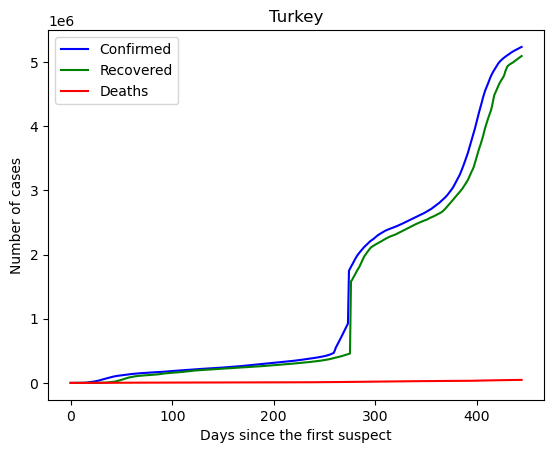

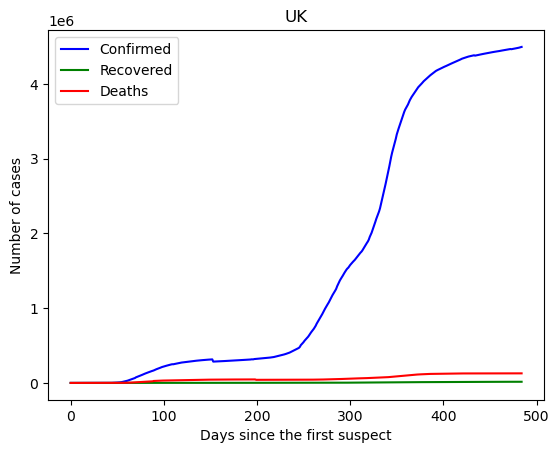

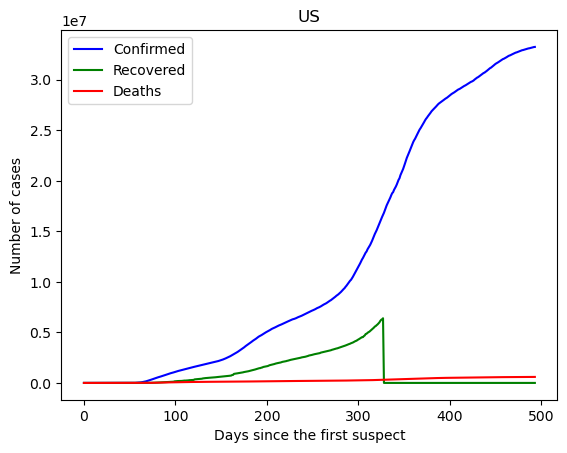

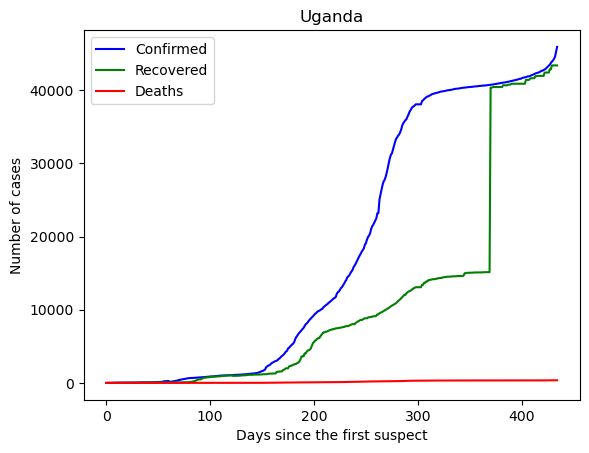

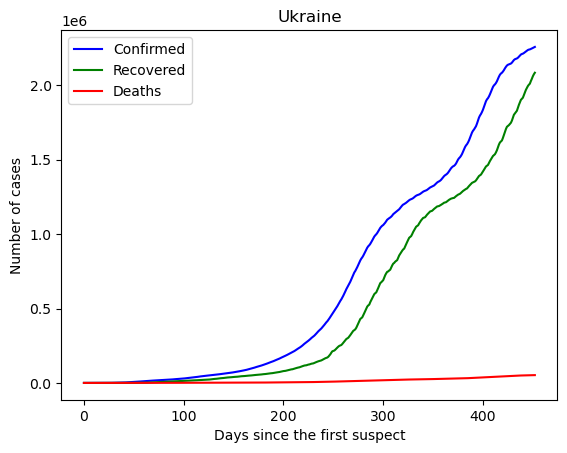

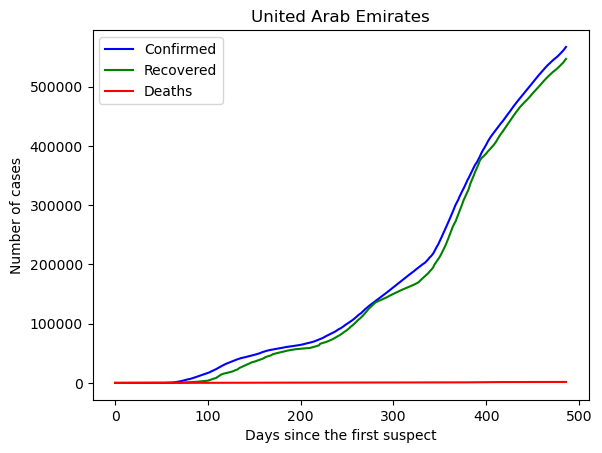

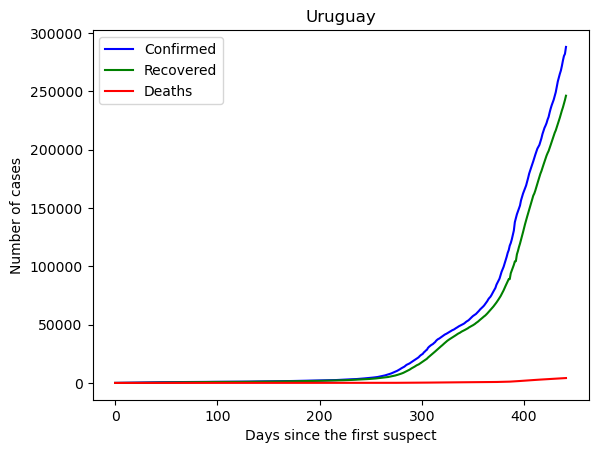

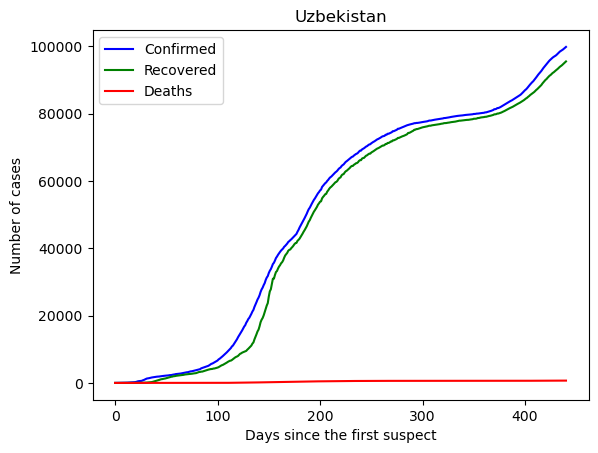

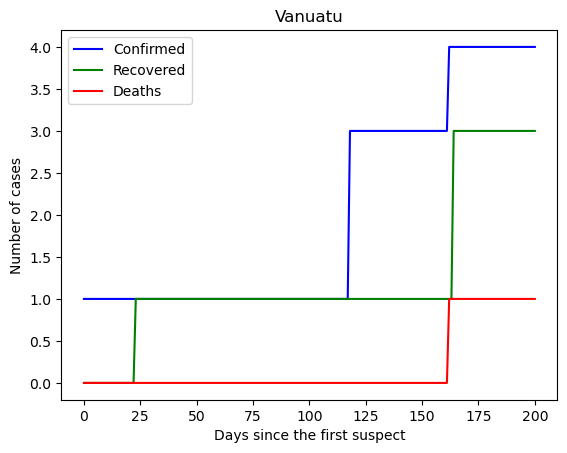

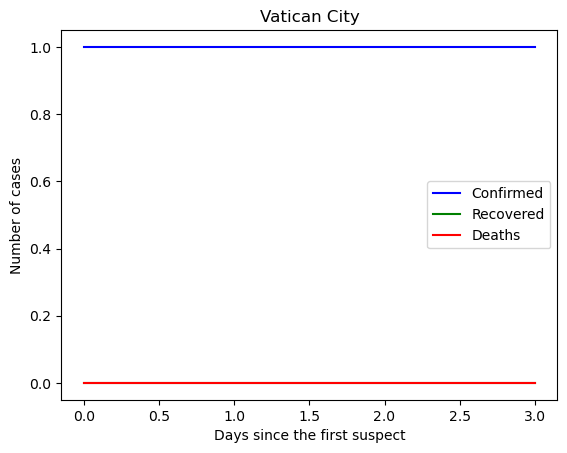

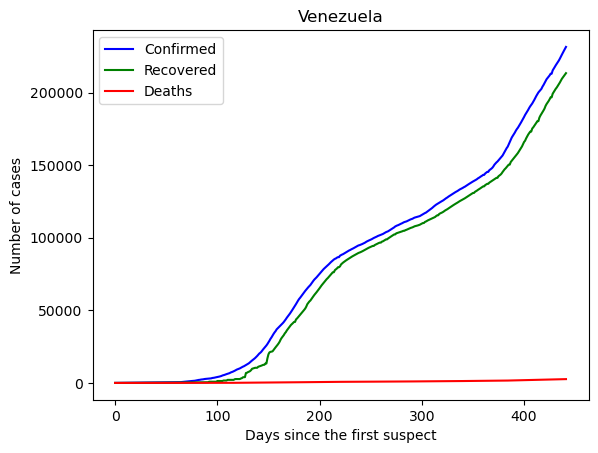

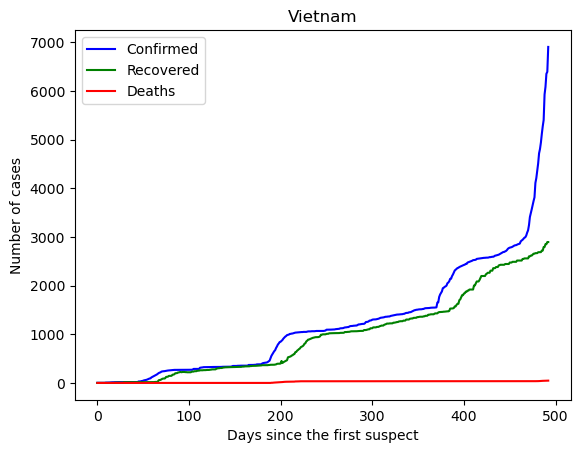

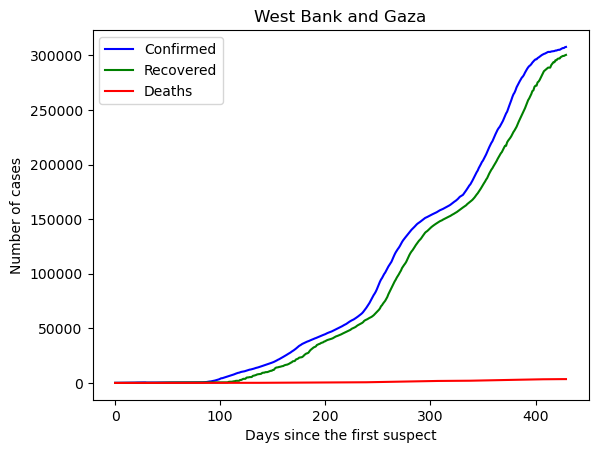

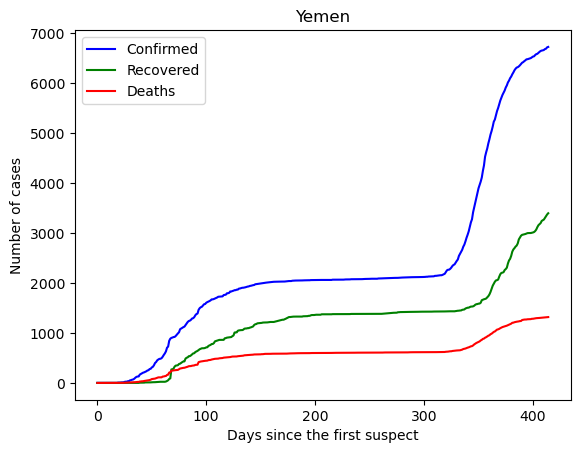

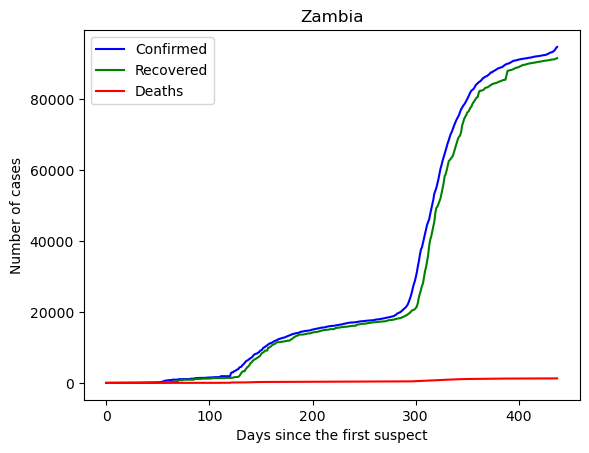

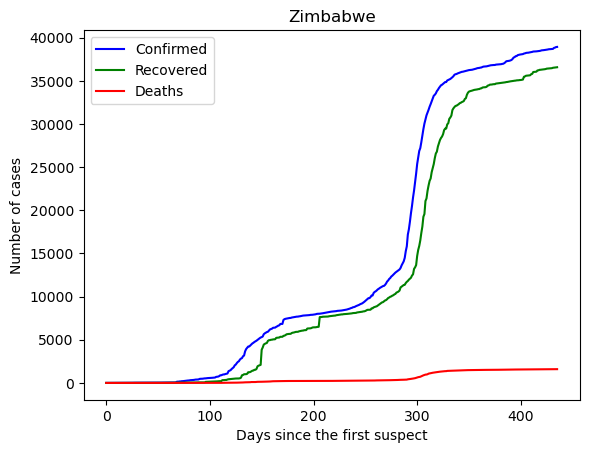

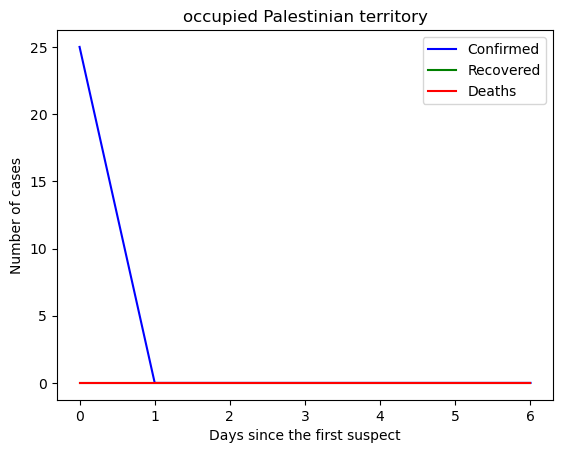

In [47]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()  